### Introduction

#### Motivation
The objective is to better understand the CRISP-DM process by focusing on investigating the dataset, setting up business questions, preparing & cleaning the data, modelling & evaluating the dataset and becoming familiarized with simple churn analysis

#### Methods
- Data Cleaning
- High Level Statistics
    - Variance Analysis
    - Standard Deviation Analysis
    - Correlation
    - Histogram Analysis
    - Box Plot Analysis
- Predictive Analytics
    - Logistic Regression
    - Support Vector Machine
    - kNN
    - Naïve Bayes
    - Random Forest
- Predictive Analytics using Boosting Algorithms
    - AdaBoost
    - Gradient Boosting
    - Xtreme Gradient Boosting
- Predictive Analytics on all models by utilizing all unique variable combination pairs

### The Dataset

#### Description
The Telco Co. data contains information about customers who have left, stayed and signed up for their services. The dataset also contains multiple important demographics for each customer

#### Data Overview
- **File(s):** wa_fn-usec_-telco-customer-churn__1_.csv
- **Table(s):** wa_fn-usec_-telco-customer-chur
- **Variables in the table:** customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges and Churn

#### Attribute Overview
- **customerID:** A unique ID that identifies each customer
- **gender:** The customer’s gender
- **SeniorCitizen:** Indicates if the customer is 65 or older
- **Partner:** Indicates if the customer has a partner or not
- **Dependents:** Indicates if the customer lives with any dependents or not (children, parents, grandparents, etc.)
- **tenure:** Indicates the total amount of months that the customer has been with the company
- **PhoneService:** Indicates if the customer has subscription of phone service or not
- **MultipleLines:** Indicates if the customer has subscription to multiple telephone lines or not
- **InternetService:** Indicates if the customer has subscription to internet service or not
- **OnlineSecurity:** Indicates if the customer has subscription to online security or not
- **OnlineBackup:** Indicates if the customer has subscription to online backup or not
- **DeviceProtection:** Indicates if the customer has subscription to device protection or not
- **TechSupport:** Indicates if the customer has subscription to tech support or not
- **StreamingTV:** Indicates if the customer uses the company's internet service to stream TV programs from a third party provider
- **StreamingMovies:** Indicates if the customer uses the company's internet service to stream movies from a third party provider
- **Contract:** Indicates the customer’s current contract type
- **PaperlessBilling:** Indicates if the customer has opted for paperless billing or not
- **PaymentMethod:** Indicates the customer’s payment method
- **MonthlyCharges:** Indicates the customer’s current total monthly charge for all the services provided by the company
- **TotalCharges:** Indicates the customer’s total charges
- **Churn:** Indicates whether the customer has churned or not

#### Importing Python libraries and Loading the dataset

In [2]:
from itertools import combinations
from sklearn import metrics, preprocessing
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('wa_fn-usec_-telco-customer-churn__1_.csv')

#### Displaying the first 5 observations

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Displaying the last 5 observations

In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Displaying the number of observations(rows) and variables(columns)

In [5]:
df.shape

(7043, 21)

#### Displaying the variable names and data types

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Changing the type of TotalCharges column from object to float

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast='float', errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

#### Converting Churn to represent Binary values

In [8]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

### Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate or incomplete data within a dataset. If data is incorrect, outcomes and algorithms become unreliable, even though they may be implemented correctly because of this it becomes crucial to perform data cleaning

The most common data cleaning practices include:

<ul style="list-style-type:square">
    <li>Removing duplicate or irrelevant observations</li>
    <li>Fixing structural errors such as strange naming conventions, typos or incorrect capitalization</li>
    <li>Filtering unwanted outliers (if needed)</li>
    <li>Handling missing data</li>
</ul>

- Count of non-missing values for each variable

In [9]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
Churn               7043
dtype: int64

- Detecting missing values

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Removing missing values

In [11]:
df.dropna(inplace=True)

- Detecting redundant data

In [12]:
df.duplicated().sum()

0

#### Descriptive statistics

Descriptive statistics summarizes a given data set, which can be either a representation of the entire population or a sample of the population. Descriptive statistics can be broken down into measures of central tendency and measures of variability/ spread. Measures of central tendency include mean, median and mode whereas measures of variability include standard deviation, variance, minimum and maximum variables, kurtosis and skewness

- **count:** Count of non-empty values
- **mean:** The mean(average) value
- **std:** Standard deviation
- **min:** Minimum value
- **25%:** The 25% percentile value
- **50%:** The 50% percentile value
- **75%:** The 75% percentile value
- **max:** Maximum value

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300537,0.265785
std,0.368844,24.545260,30.085974,2266.771484,0.441782
min,0.000000,1.000000,18.250000,18.799999,0.000000
25%,0.000000,9.000000,35.587500,401.449997,0.000000
50%,0.000000,29.000000,70.350000,1397.475037,0.000000
75%,0.000000,55.000000,89.862500,3794.737488,1.000000
max,1.000000,72.000000,118.750000,8684.799805,1.000000


#### Summarizing the dataframe

A short summary of the dataframe which consists of information such as RangeIndex, Data columns, dtypes and memory usage

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### High Level Statistics

High level statistics describes those operations that are more abstract in nature, wherein the overall goals and systemic features are typically more concerned with the wider, macro system as a whole

#### Variance Analysis

Variance is the expected value of the squared variation of a random variable from its mean. In other words, variance estimates how far the data points are spread out from their mean

In [15]:
df.var(numeric_only=True)

SeniorCitizen     1.360459e-01
tenure            6.024698e+02
MonthlyCharges    9.051658e+02
TotalCharges      5.138252e+06
Churn             1.951711e-01
dtype: float64

#### Standard Deviation Analysis

Standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. A standard deviation close to zero indicates that data points are close to the mean, whereas a high or low standard deviation indicates data points are respectively above or below the mean

In [16]:
df.std(numeric_only=True)

SeniorCitizen        0.368844
tenure              24.545260
MonthlyCharges      30.085974
TotalCharges      2266.771484
Churn                0.441782
dtype: float64

From the analysis of Variance and Standard Deviation it can be concluded that:

<ul style="list-style-type:square">
    <li>The data points of TotalCharges, MonthlyCharges and tenure are quite spread out, away from the mean and from one another becuase these two attributes have the highest variance and standard deviation</li>
    <li>The other attributes Churn and SeniorCitizen represent binary values that is why they have low variance and standard deviation</li>
</ul>

#### Correlation

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data.The correlation coefficient 'r' describes the extent of this statistical relationship

A correlation coefficient of zero indicates that no linear relationship exists between the two variables. A correlation coefficient of −1 or +1 indicates a perfect linear relationship. The stronger the correlation, the closer the correlation coefficient is to ±1. If the coefficient is a positive number, the variables are directly related (i.e. as the value of one variable goes up the value of the other also tends to go up). But if the coefficient is a negative number, the variables are inversely related (i.e. as the value of one variable goes up the value of the other tends to go down)

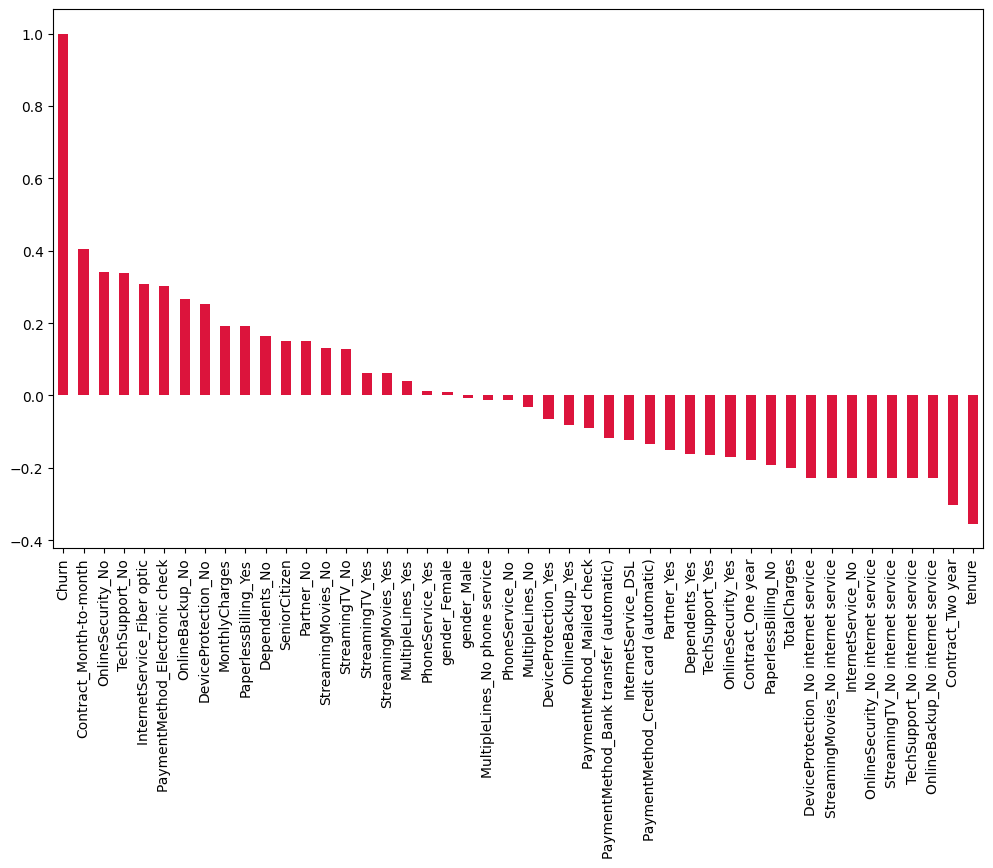

In [17]:
# Converting categorical variable into indicator variables after dropping customerID column
df2 = pd.get_dummies(df.drop('customerID', axis=1))

fig, ax = plt.subplots(figsize=(12, 7))
corr = df2.corr()['Churn'].sort_values(ascending=False)
corr.plot(kind='bar', color='crimson', ax=ax)
plt.show()

Since our analysis focuses on analyzing the churn rate we will keep an eye out for correlations that involve churn specifically

<ul style="list-style-type:square">
    <li>Contract(Month-to-Month) and Churn have the strongest correlation that of 0.4</li>
    <li>No OnlineSecurity and Churn also have a strong correlation score of 0.34</li>
    <li>The third highest correlation of 0.33 exists between No TechSupport and Churn</li>
</ul>

#### Histogram Analysis

A histogram is a graphical representation of data points organized into user-specified ranges. Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins

A histogram can be used whenever there is a need to display a comparison of the distribution of certain numerical data in various range of intervals. Histograms can help the audience understand essential meanings and patterns related to a large amount of data

Histograms can be classified as:

<ul style="list-style-type:square">
    <li><b>Uniformly Distributed:</b> A uniform distribution reveals that the number of classes is too small and that each class has the same number of elements. It may involve a distribution that has several peaks</li>
    <li><b>Positively Skewed (Right-skewed):</b> A positively skewed histogram has a right-skewed distribution. In a right-skewed distribution, most of the data points occur on the left side as compared to the right</li>
    <li><b>Negatively Skewed (Left-skewed):</b> A negatively skewed histogram has a left-skewed distribution. In a left-skewed distribution, most of the data points occur on the right side as compared to the left</li>
    <li><b>Symmetric (Bell-shaped):</b> A symmetric histogram has a bell-shaped distribution. When you draw the vertical line down the center of the histogram and the two sides are identical in size and shape, the histogram is said to be symmetric</li>
    <li><b>Randomly Distributed:</b> A random distribution lacks an apparent pattern and has several peaks. The case may be that different data properties were combined. Therefore, the data should be analyzed separately</li>
</ul>

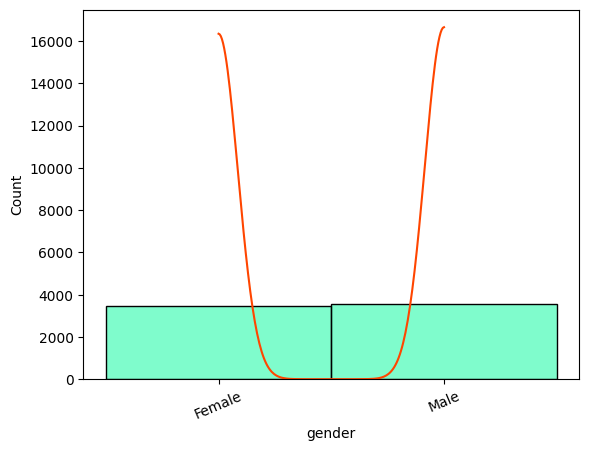

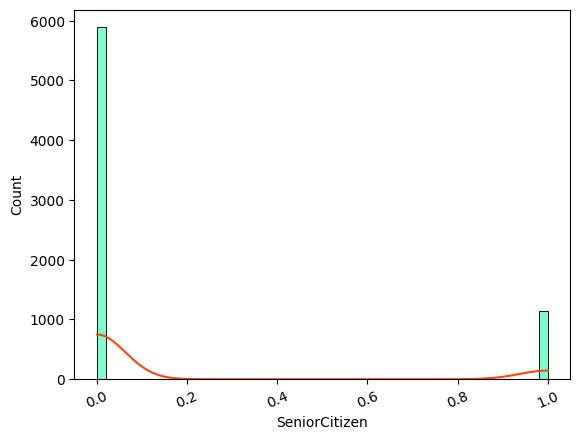

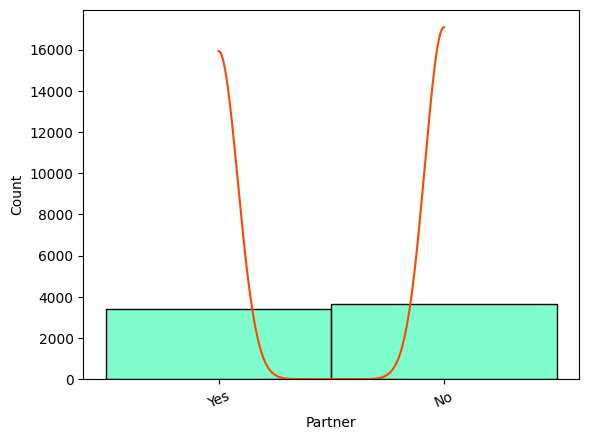

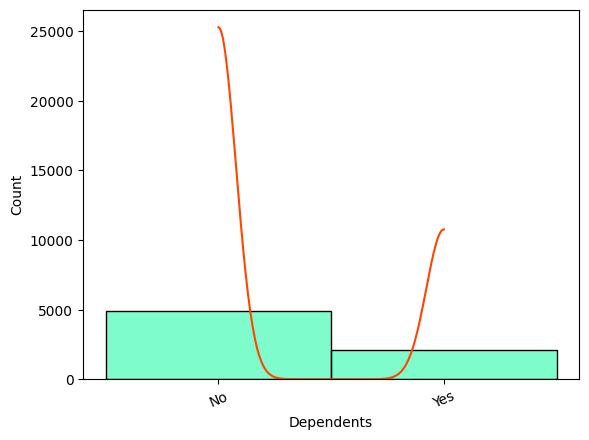

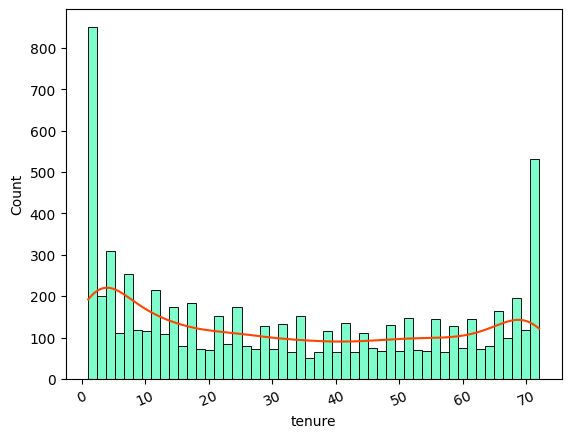

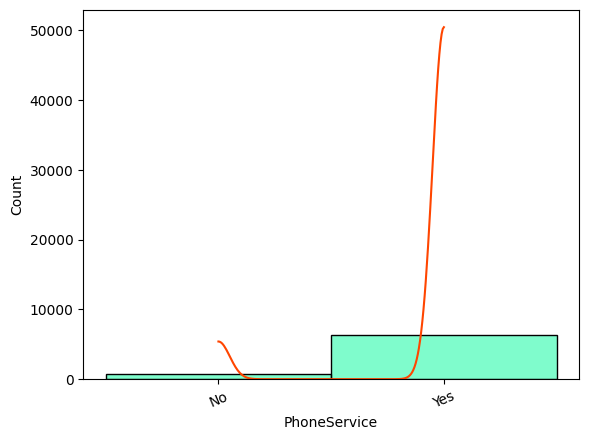

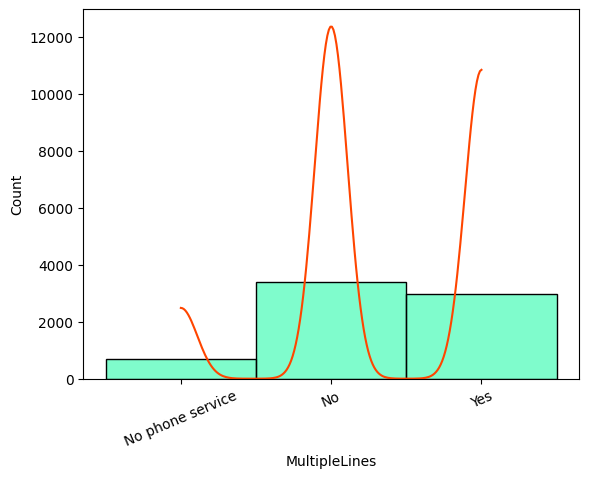

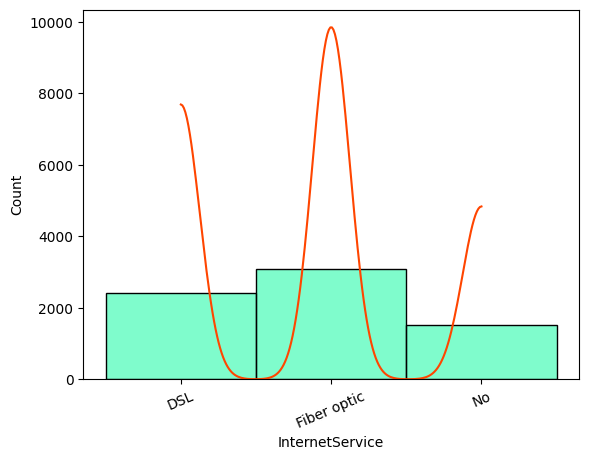

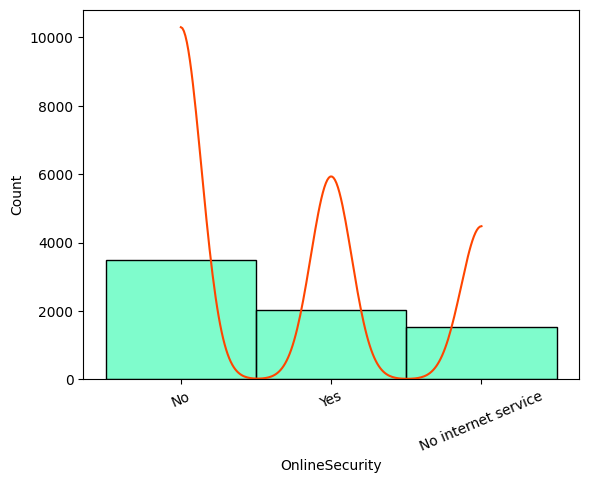

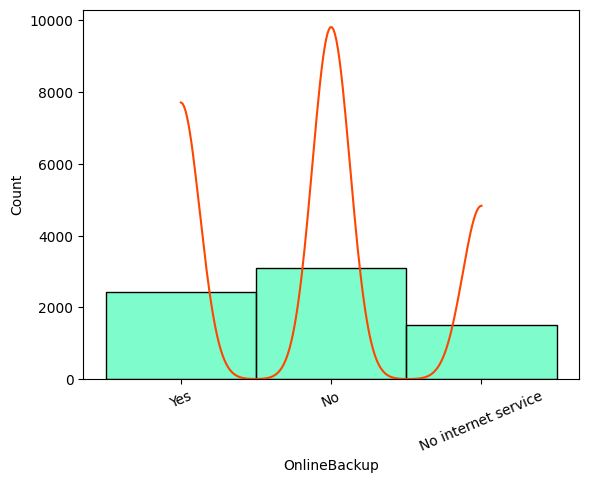

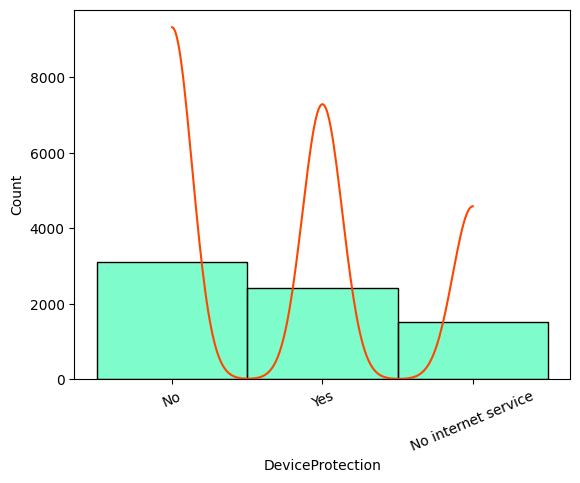

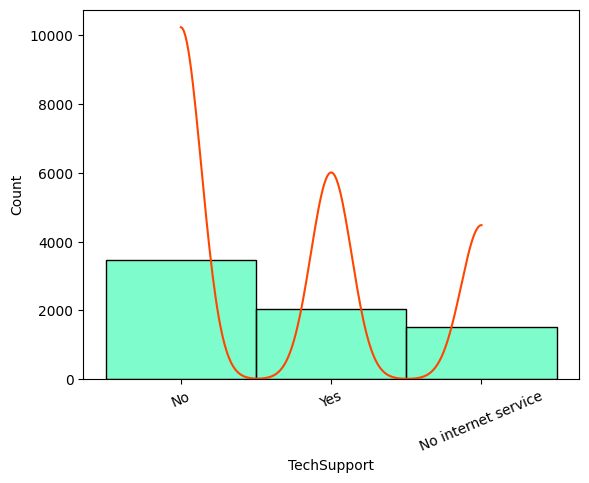

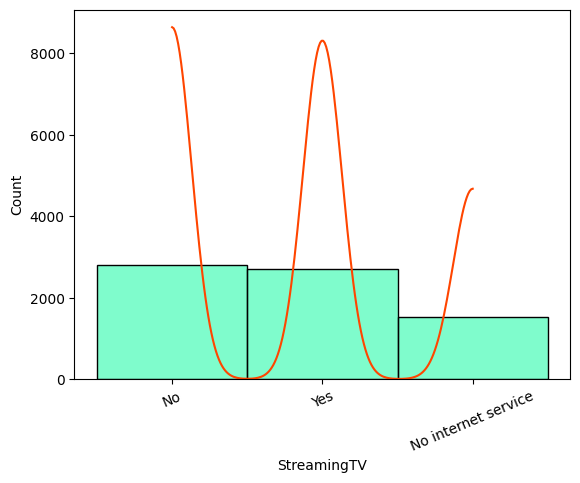

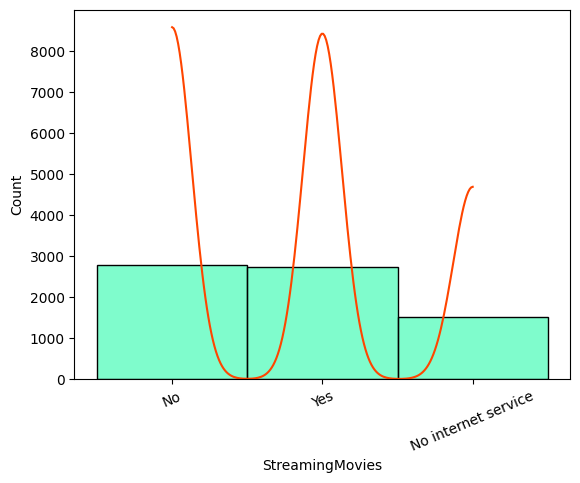

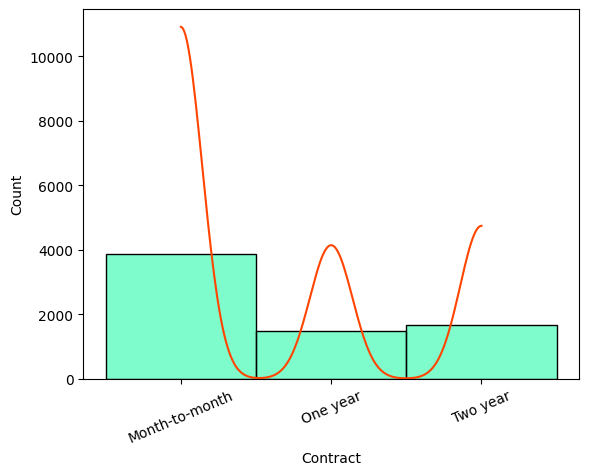

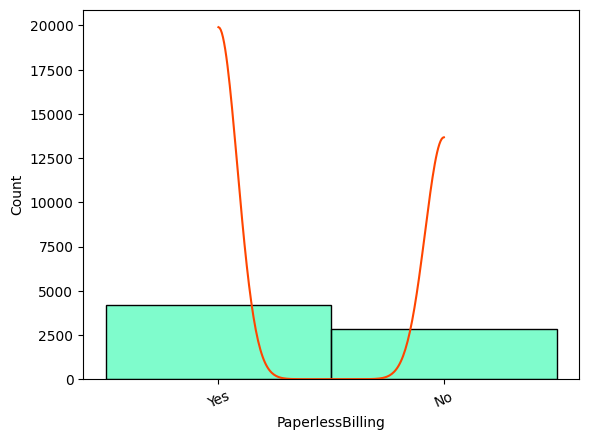

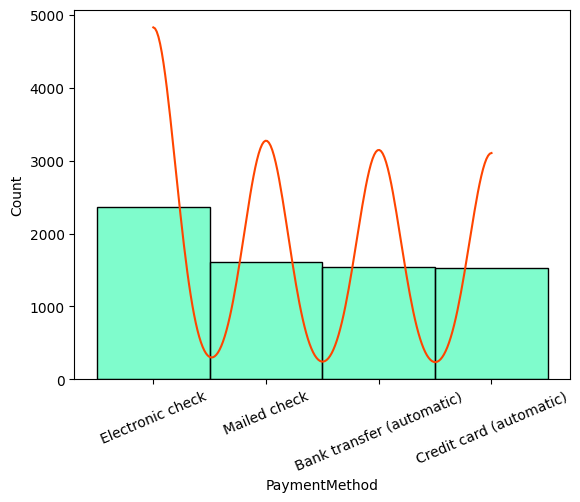

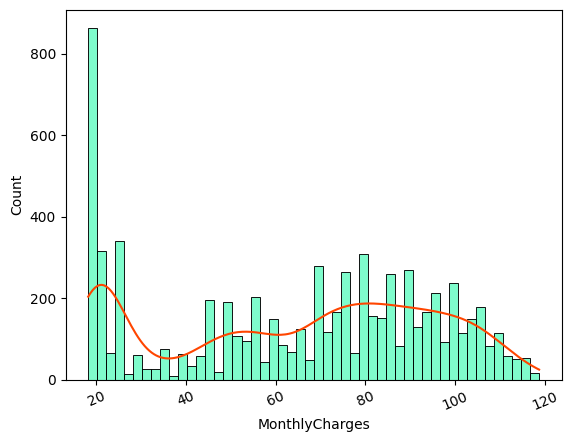

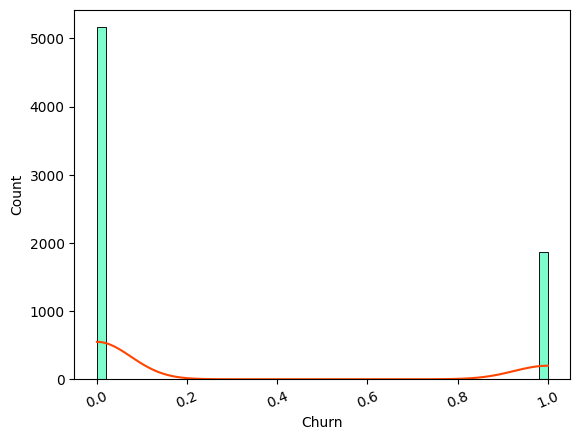

In [18]:
for col in df.columns:
    if col not in ['customerID', 'TotalCharges']:
        ax = sns.histplot(data=df, x=col, kde=True, bins=50, color='mediumspringgreen')
        ax.lines[0].set_color('orangered')
        plt.xticks(rotation=23)
        plt.show()

The histograms above can be classified as:

<ul style="list-style-type:square">
    <li><b>Uniformly Distributed:</b> Gender, Partner</li>
    <li><b>Positively Skewed (Right-skewed):</b> SeniorCitizen, Dependents, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Paperless Billing, Payment Method, Churn</li>
    <li><b>Negatively Skewed (Left-skewed):</b> PhoneService</li>
    <li><b>Randomly Distributed:</b> Tenure, MultipleLines, InternetService, OnlineBackup, Contract, MonthlyCharges</li>
</ul>

Kernel Density Estimation which is a mathematical process of finding an estimate probability density function of a random variable has also been implemented and showcased in the histograms above. The estimation attempts to infer characteristics of a population, based on a finite set of data. The data smoothing problem is a powerful way to estimate probability density. In short, the technique allows one to create a smooth curve against a set of random values

The histograms of Tenure, MultipleLines, InternetService, OnlineBackup, Contract and MonthlyCharges are Randomly Distributed so they need to analysed by considering the various categorical variables available to us so that we can draw proper conclusions from the data

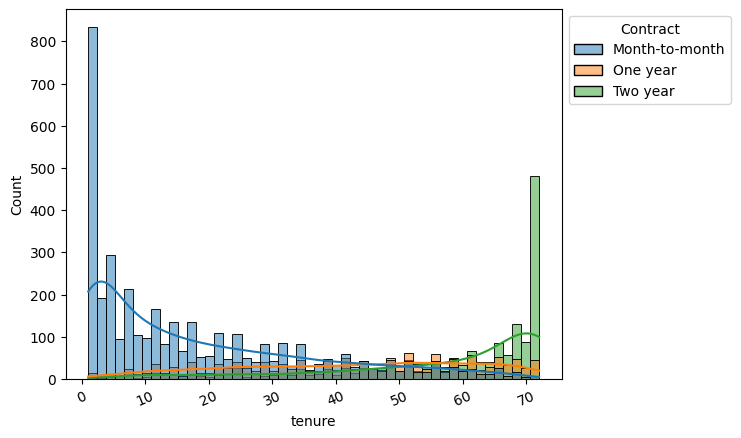

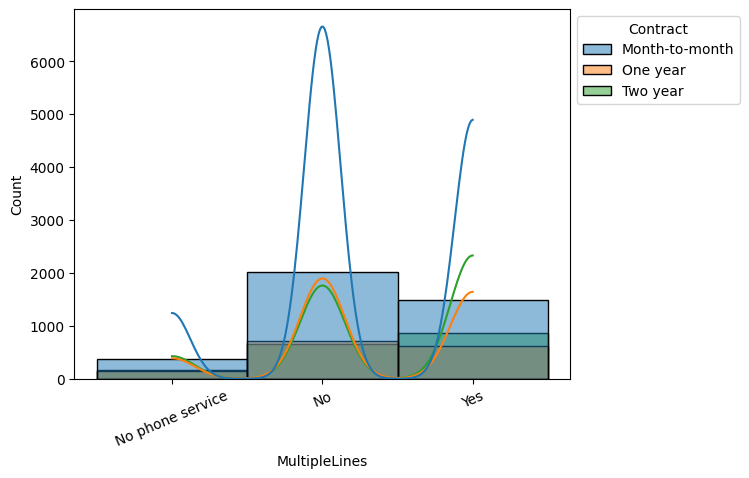

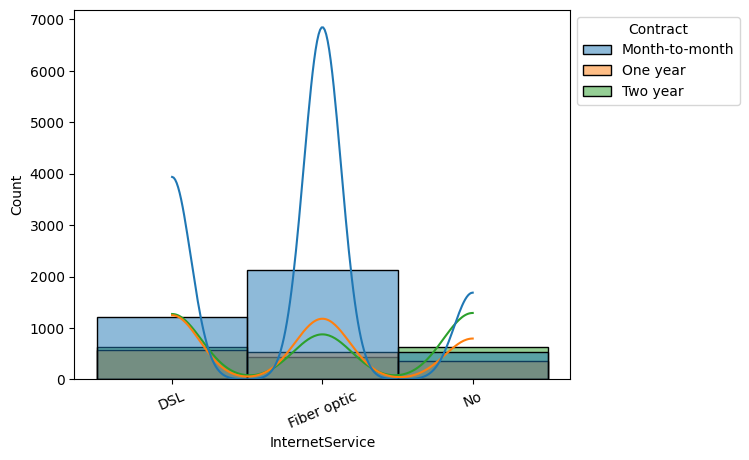

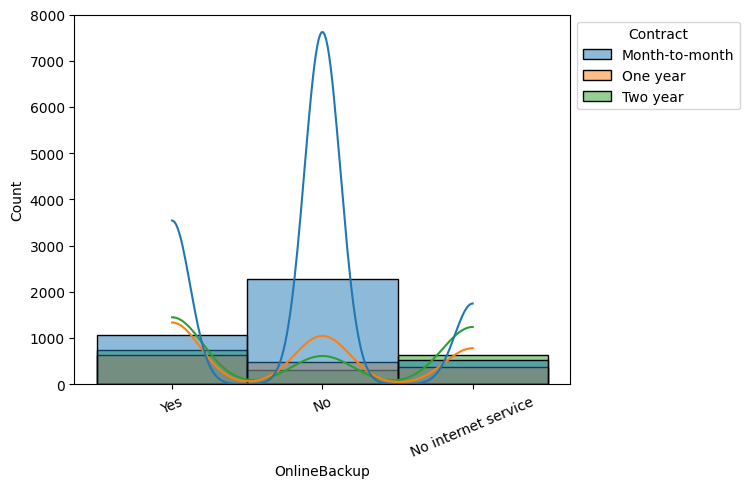

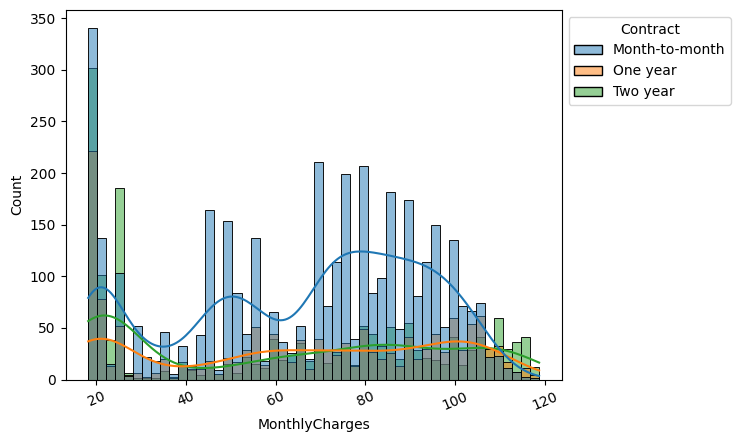

In [19]:
for col in ['tenure', 'MultipleLines', 'InternetService', 'OnlineBackup', 'MonthlyCharges']:
    ax = sns.histplot(data=df, x=col, kde=True, bins=50, hue='Contract')
    sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=23)
    plt.show()

After considering the various categorical variables available to us the best results are obtained by the categorization of NObeyesdad which allows the histograms of Weight and FCVC to be properly classified. The other categorical variables Gender, FAVC, CAEC etc. were unable to provide any fruitful results for the same

The histograms above can thus be classified as:

<ul style="list-style-type:square">
    <li><b>Positively Skewed (Right-skewed):</b> Tenure(Month-to-Month), InternetService(One Year)</li>
    <li><b>Negatively Skewed (Left-skewed):</b> Tenure(Two Year), MultipleLines(Two Year)</li>
    <li><b>Symmetric (Bell-shaped):</b> Tenure(One Year)</li>
    <li><b>Randomly Distributed:</b> MultipleLines(Month-to-Month, One Year), InternetService(Month-to-Month, Two Year), OnlineBackup, MonthlyCharges</li>
</ul>

Sadly the histogram of MultipleLines(Month-to-Month, One Year), InternetService(Month-to-Month, Two Year), OnlineBackup and MonthlyCharges are still classified as Randomly Distributed

Histograms can also be used for comparative analysis so individual plots for all the categorical variables in the dataset will be plotted based on the number of users that have churned or not while also following the classification of that category. This will broaden the horizon and provide results which can be utilized to find the many varying factors which have been leading to churns

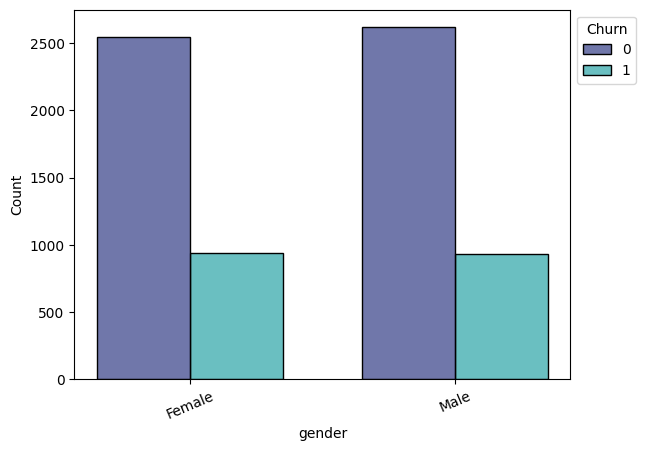

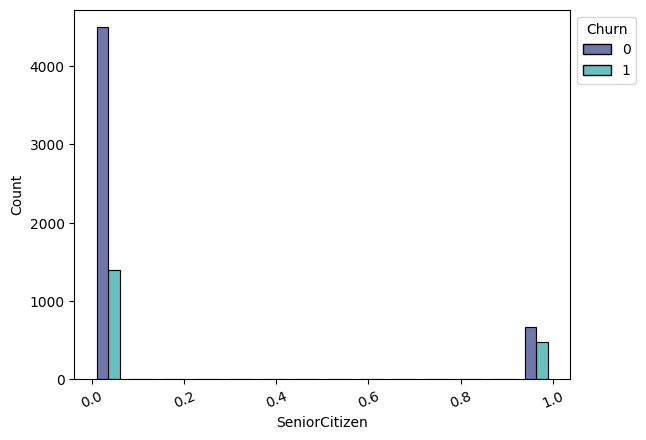

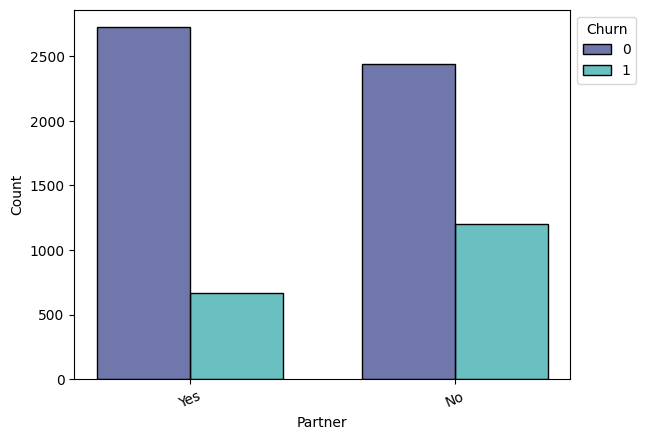

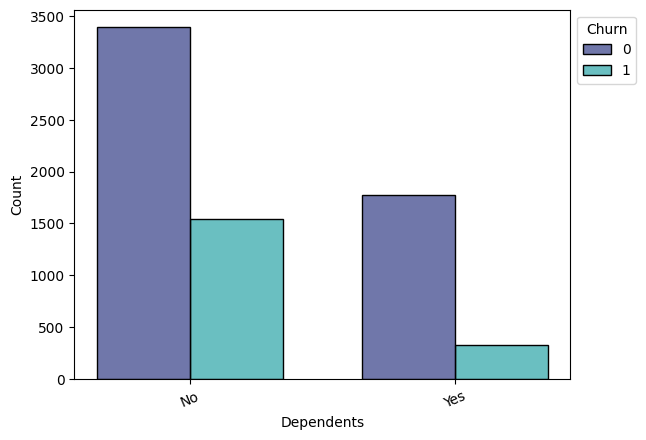

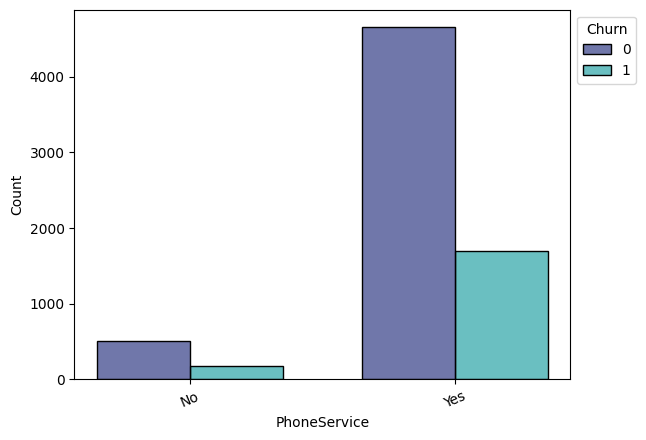

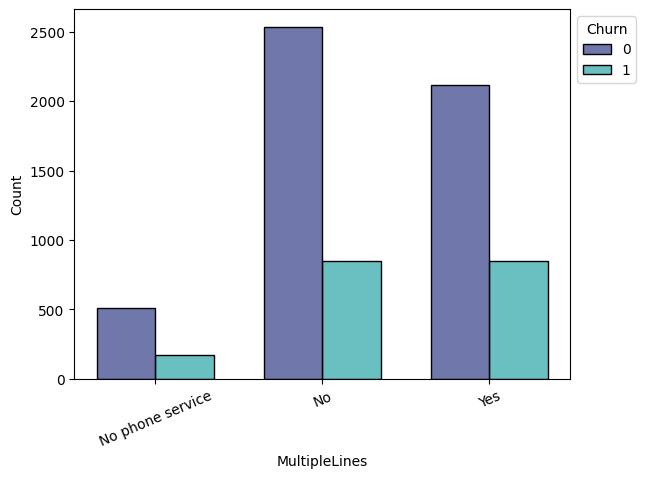

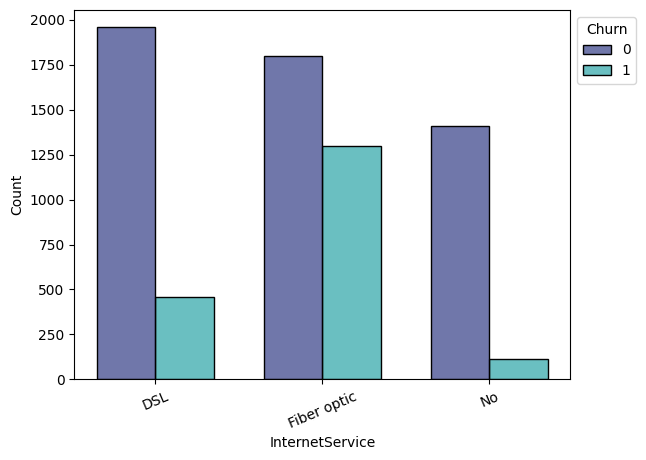

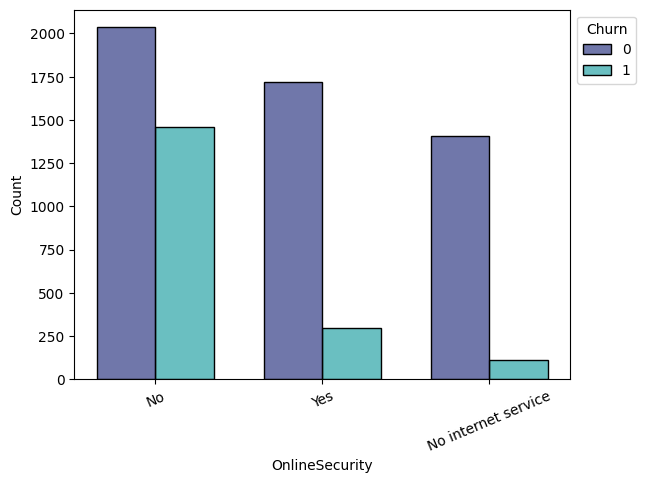

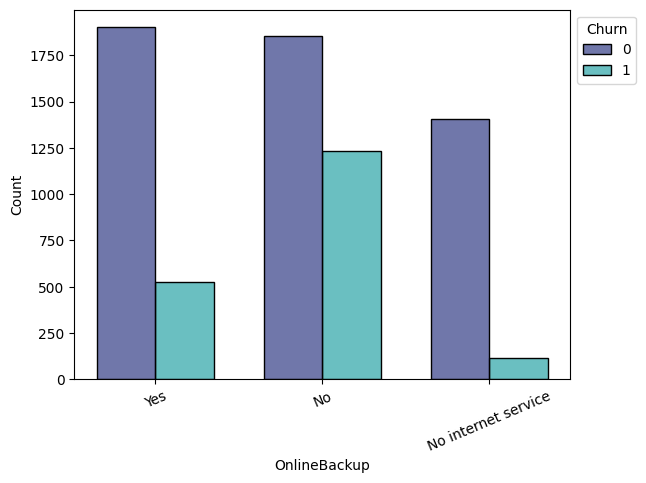

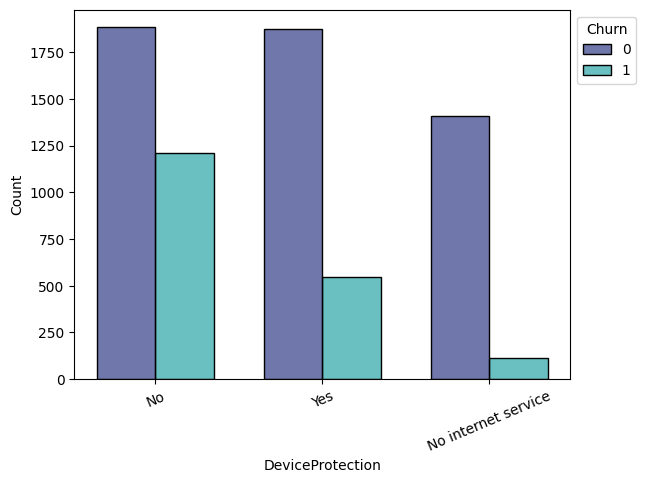

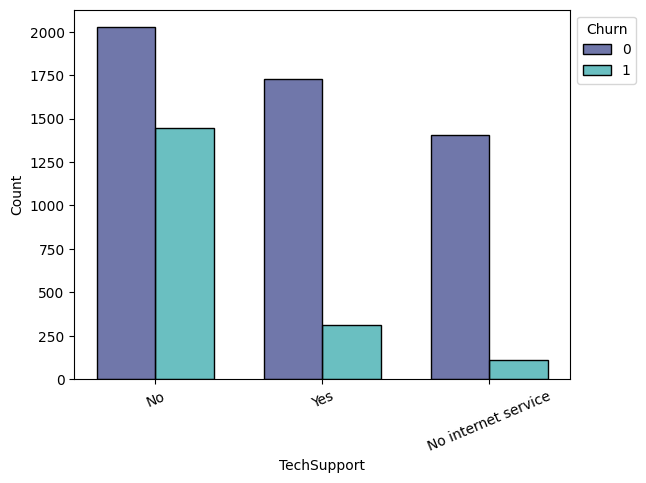

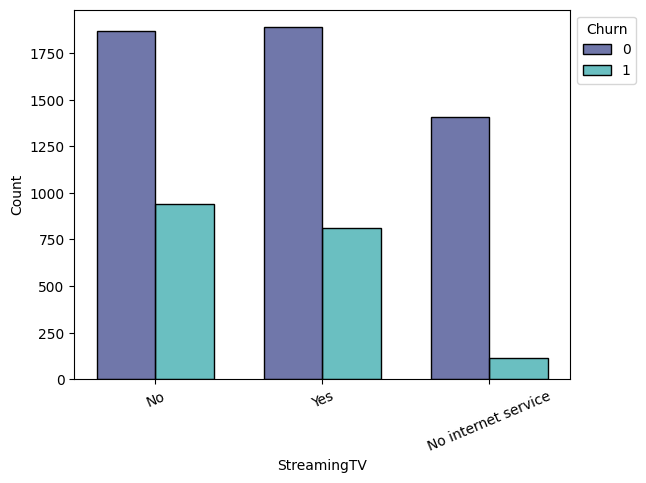

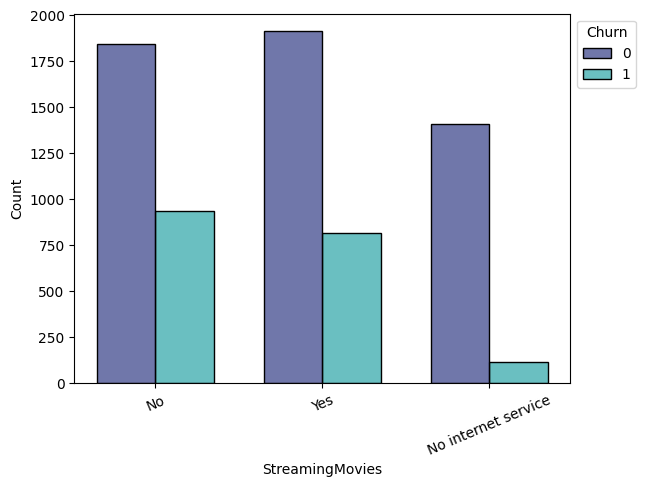

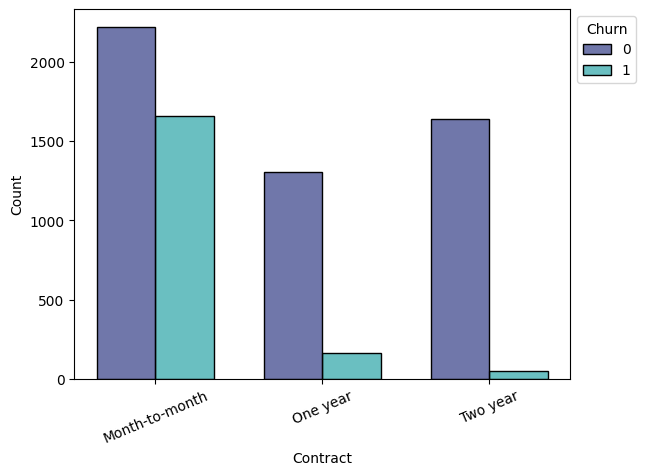

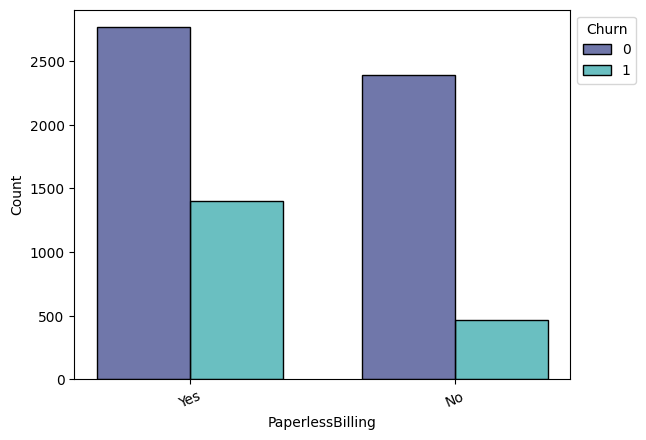

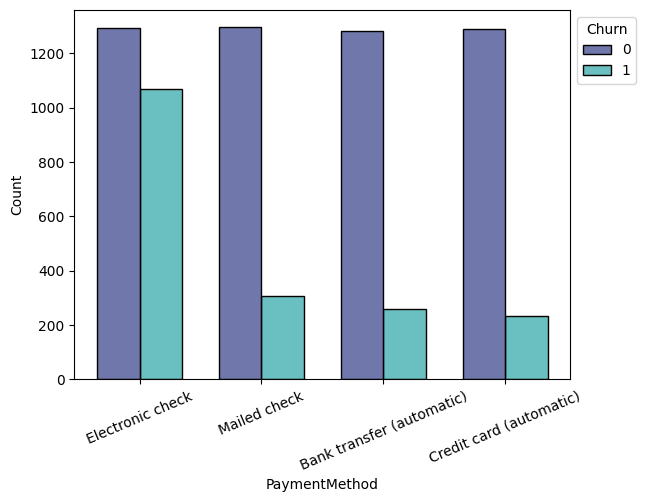

In [20]:
for col in df.columns:
    if col not in ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']:
        ax = sns.histplot(data=df, x=col, hue='Churn', multiple='dodge', shrink=.7, palette='mako')
        sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
        plt.xticks(rotation=23)
        plt.show()

From the histograms above we can conclude that:

<ul style="list-style-type:square">
    <li>The number of male and female users that have churned is almost the same</li>
    <li>The younger generation has almost double the churn rate as compared to their elder counterparts</li>
    <li>Customers that do not have a partner are more prone to churn</li>
    <li>Customers that do not have dependents are more inclined to churn</li>
    <li>Customers that opted for PhoneService are churning more and whether they have MultipleLines or not the churn rate seems to be almost the same</li>
    <li>Customers that opted for Fiber optic InternetService are more liable to churn</li>
    <li>Customers that do not have OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport partner are more susceptible to churn</li>
    <li>Customers that do or do not utilize StreamingTV and StreamingMovies are almost equally likely to churn</li>
    <li>Customers that have a Month-to-Month Contract are more willing to churn</li>
    <li>Customers that utilize PaperlessBilling and Electronic checks as their PaymentMethod are churning more</li>
</ul>

#### Box Plot Analysis

Box plots visualize the data in a standardized way using 5 summaries – Minimum, First Quartile (Q1), Median, Third Quartile (Q3) and Maximum. Box plot is also termed as box and whisker plot

<ul style="list-style-type:square">
    <li><b>Minimum:</b> The minimum value from the data</li>
    <li><b>First Quartile (Q1):</b> The first quartile is the median of the lower half of the data. Also known as lower quartile</li>
    <li><b>Median:</b> The median is the middle value of the data, which divides the data into two equal parts. The median is considered as the second quartile</li>
    <li><b>Third Quartile (Q3):</b> The third quartile is the median of the upper half of the data. Also known as upper quartile</li>
    <li><b>Maximum:</b> The maximum value from the data</li>
</ul>

Box Plots can be classified as:

<ul style="list-style-type:square">
    <li><b>Positively Skewed:</b> If the distance from the median to the maximum is greater than the distance from the median to the minimum, then the box plot is positively skewed</li>
    <li><b>Negatively Skewed:</b> If the distance from the median to minimum is greater than the distance from the median to the maximum, then the box plot is negatively skewed</li>
    <li><b>Symmetric:</b> The box plot is said to be symmetric if the median is equidistant from the maximum and minimum values</li>
</ul>

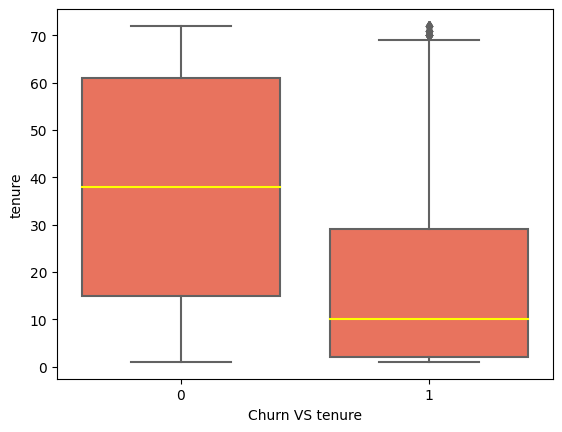

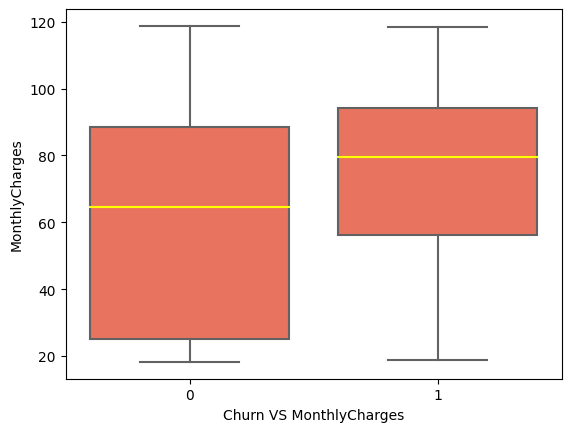

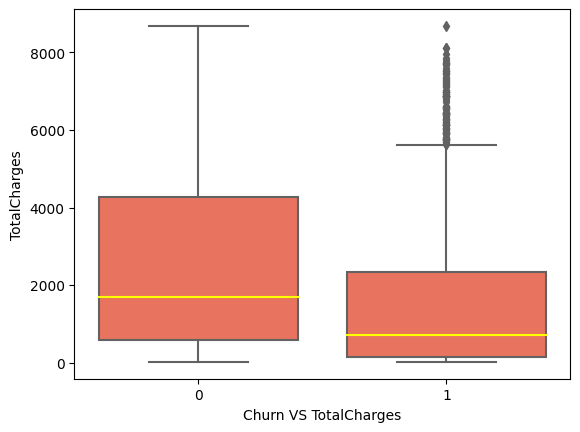

In [21]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.boxplot(x=df['Churn'], y=df[col], color='tomato', medianprops={'color': 'yellow'})
    plt.xlabel(f'Churn VS {col}')
    plt.show()

From the box plots above we can conclude that:

<ul style="list-style-type:square">
    <li>Customers that tend to churn tend to stay for shorter tenures with the company as seen in the Churn VS tenure plot</li>
    <li>The lower the MonthlyCharges the lesser is the chance that the customer may churn based on the Churn VS MonthlyCharges plot</li>
    <li>Churn seems to be higher when the TotalCharges are lower however there are many outliers which also indicates that churn is higher if the TotalCharges become exorbitant thus finding the right balance can prove to be crucial in determining whether a customer will churn or not</li>
</ul>

The box plots above can be classified as:

<ul style="list-style-type:square">
    <li><b>Positively Skewed:</b> Tenure(Churn), MonthlyCharges(No Churn), TotalCharges(Churn and No Churn)</li>
    <li><b>Negatively Skewed:</b> MonthlyCharges(Churn)</li>
    <li><b>Symmetric:</b> Tenure(No Churn)</li>
</ul>

### Predictive Analytics

Predictive analytics is a branch of advanced analytics that makes predictions about future outcomes using historical data combined with statistical modelling, data mining techniques and machine learning. Predictive analytics is used to find patterns in data to identify risks and opportunities

#### Logistic Regression

Logistic Regression is used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on the attributes of the dataset. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds which means that the probability of success divided by the probability of failure

Logistic Regression can be classified as:

<ul style="list-style-type:square">
    <li><b>Binomial:</b> Logistic Regression can be classified as Binomial when the dependent variable has only two possible outcomes such as 0 or 1, True or False, etc.</li>
    <li><b>Multinomial:</b> In this type of logistic regression, the dependent variable has three or more possible outcomes however, these values have no specified order</li>
    <li><b>Ordinal:</b> Ordinal logistic regression is leveraged when the response variable has three or more possible outcomes but in this case, these values do have a defined order. For example grading scales from A to F or rating scales from 1 to 5</li>
</ul>

In [22]:
y = df2['Churn'].values
x = df2.drop('Churn', axis=1)

# Bounding all the variables between 0 and 1
scaler = preprocessing.MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the Logistic Regression model
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)

# Making predictions on test set
y_pred = lr.predict(x_test)

# Actual value VS Predicted value
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
lr_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [24]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8


<Axes: >

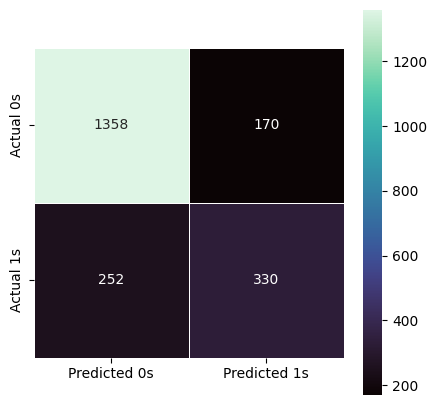

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='mako')

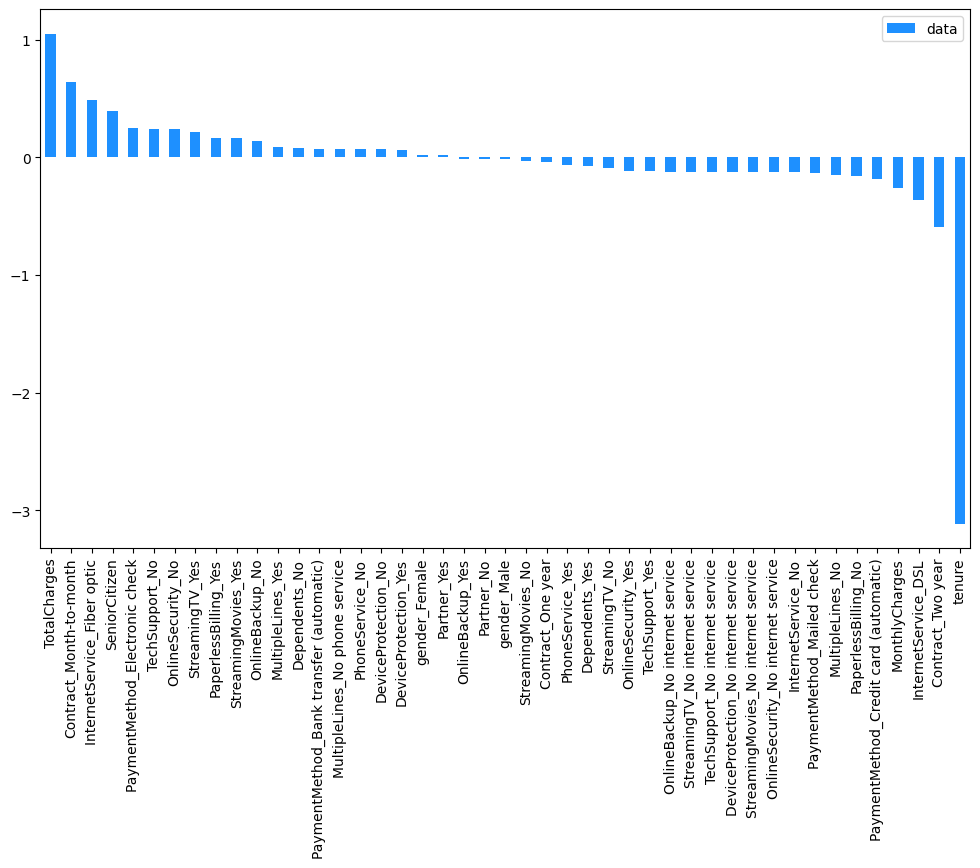

In [26]:
data = pd.DataFrame(lr.coef_[0], index=x.columns, columns=['data']).sort_values('data', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
data.plot(kind='bar', color='dodgerblue', ax=ax)
plt.show()

Some conclusions that can be drawn are:

<ul style="list-style-type:square">
    <li>TotalCharges, Contract(Month-to-Month) and InternetService(Fiber optic) have the most adverse effect on the churn rate</li>
    <li>Contract(Two year), InternetService(DSL) and tenure reduce the chance of churn</li>
</ul>

The Logistic Regression model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.8</li>
    <li><b>Correct Predictions:</b> 1688</li>
    <li><b>Incorrect Predictions:</b> 422</li>
    <li><b>Type:</b> Binomial</li>
</ul>

#### Support Vector Machine

Support Vector Machine or SVM is used for Classification as well as Regression problems. Primarily it is used for Classification problems in Machine Learning. The goal in SVM is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily categorize new data points. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence the algorithm is termed as Support Vector Machine

SVM is of two types:

<ul style="list-style-type:square">
    <li><b>Linear:</b> Linear SVM is used for linearly separable data, which means that the dataset can be classified into two classes by using a straight line, then such data is linearly separable thus the classifier used is known as Linear SVM</li>
    <li><b>Non-Linear:</b> Non-Linear SVM is used for non-linear data, which means that the dataset cannot be classified by using a straight line because there are more than two classes, then such data is non-linear and the classifier used is known as Non-linear SVM</li>
</ul>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the SVM model
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

# Making predictions on test set
y_pred = svm.predict(x_test)

# Actual value VS Predicted value
svm_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
svm_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [ ]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7895734597156399


<AxesSubplot: >

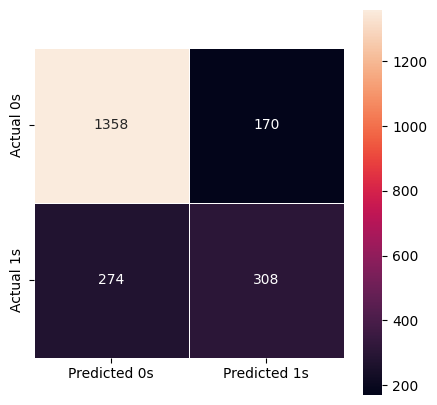

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='rocket')

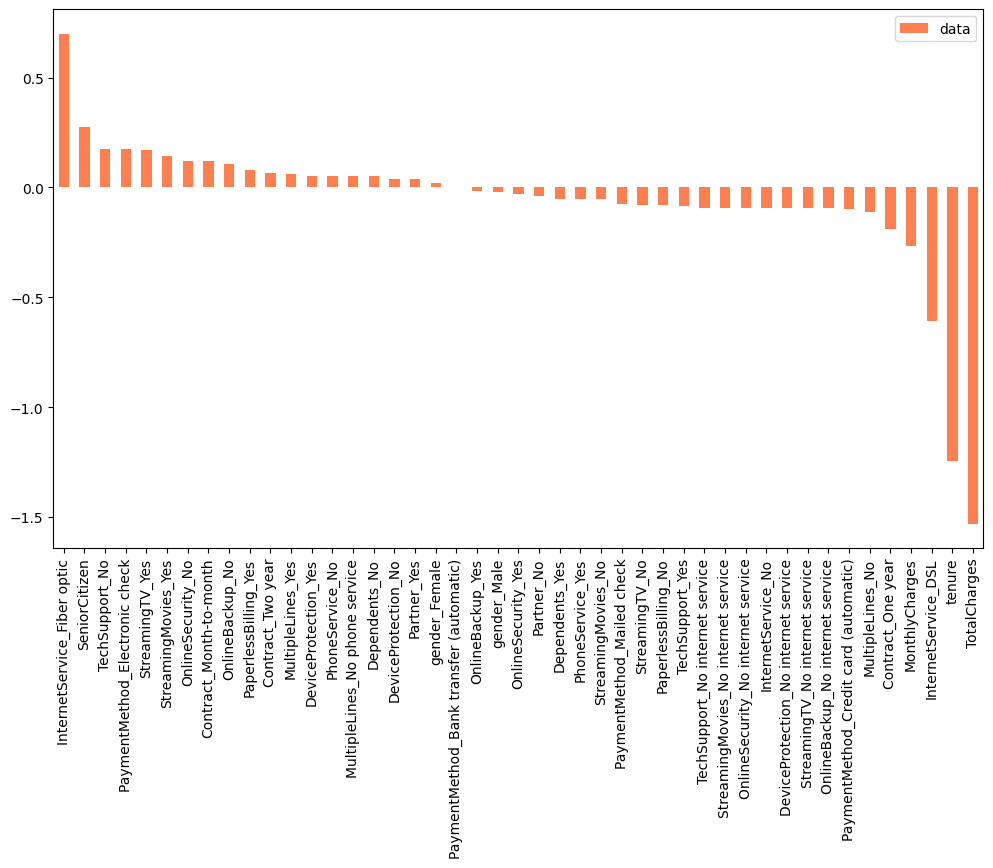

In [ ]:
data = pd.DataFrame(svm.coef_[0], index=x.columns, columns=['data']).sort_values('data', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
data.plot(kind='bar', color='coral', ax=ax)
plt.show()

Some conclusions that can be drawn are:

<ul style="list-style-type:square">
    <li>InternetService(Fiber optic), Seniority and TechSupport(No) have the most adverse effect on the churn rate</li>
    <li>TotalCharges, tenure and InternetService(DSL) reduce the chance of churn</li>
</ul>

The SVM model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.7895734597156399</li>
    <li><b>Correct Predictions:</b> 1666</li>
    <li><b>Incorrect Predictions:</b> 444</li>
    <li><b>Type:</b> Linear</li>
</ul>

#### kNN

The k-nearest neighbors algorithm, also known as kNN is a non-parametric, supervised learning algorithm which uses proximity to make classifications or predictions about the grouping of individual data points. It can be used for both regression and classification problems but is typically used as a classification algorithm, working off the assumption that similar points can be found near one another

The kNN algorithm thus can be considered as a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ neighbors in the feature space. Imagine a small village with a few hundred residents, and you must decide which political party you should vote for. To do this, you might go to your nearest neighbors and ask which political party they support. If the majority of your 'k' nearest neighbors support party A, then you would most likely also vote for party A. This is similar to how the kNN algorithm works where the majority class label determines the class label of a new data point among its k nearest neighbors

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the KNN model
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train, y_train)

# Making predictions on test set
y_pred = knn.predict(x_test)

# Actual value VS Predicted value
knn_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
knn_diff.head()

,Actual value,Predicted value
0,0,1
1,1,0
2,0,0
3,1,0
4,0,0


In [ ]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7530805687203791


In kNN the model's performance is dependent on way the data is split which means that we may be able to improve the model's performance by  optimizing the value of 'k' (the number of neighbors) and the leaf size. A solution for this is cross-validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples which represents the number of folds. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged or combined to produce a single estimation. The advantage of this is that all observations are used for both training and testing and that each observation is used for testing exactly once

In [ ]:
param_grid = {
    'n_neighbors': [i for i in range(5, 51)],
    'leaf_size': [i for i in range(30, 51)]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, n_jobs=-1)
knn_cv.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                                       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, ...],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, ...]})

In [ ]:
knn_cv.best_params_

{'leaf_size': 30, 'n_neighbors': 48}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the kNN model
knn = KNeighborsClassifier(n_neighbors=48)
knn.fit(x_train, y_train)

# Making predictions on test set
y_pred = knn.predict(x_test)

# Actual value VS Predicted value
knn_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
knn_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [ ]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7796208530805687


<AxesSubplot: >

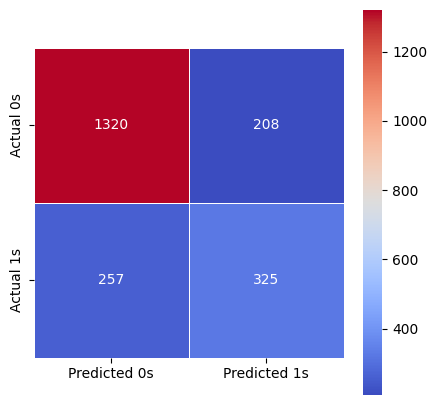

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='coolwarm')

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.7796208530805687</li>
    <li><b>Correct Predictions:</b> 1686</li>
    <li><b>Incorrect Predictions:</b> 424</li>
</ul>

#### Naïve Bayes

The Naïve Bayes classifier is a supervised machine learning algorithm which is used for classification. It is also part of the family of generative learning algorithms which means that it seeks to model the distribution of inputs of a given class or category. Unlike discriminative classifiers, like logistic regression, it does not learn which features are most important to differentiate between classes.

Naïve Bayes is also known as a probabilistic classifier since it is based on Bayes’ Theorem. Bayes’ Theorem is distinguished by its use of sequential events where information acquired later impacts the initial probability. These probabilities are denoted as the prior probability and the posterior probability. The prior probability is the probability of the occurence of an event before it has been contextualized under a certain condition whereas the posterior probability is the probability of the occurence of an event after it has been contextualized under a certain condition

Naïve Bayes is of three types:

<ul style="list-style-type:square">
    <li><b>Gaussian:</b> The Gaussian model assumes that features follow a normal distribution. This means that the predictor takes continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution</li>
    <li><b>Multinomial:</b> The Multinomial Naïve Bayes classifier is used when the data is multinomial in nature. It is primarily used for document classification problems which means a particular document belongs to a category such as Sports, Politics, Education, etc. The classifier uses the frequency of words as the predictors</li>
    <li><b>Bernoulli:</b> The Bernoulli classifier works similar to the Multinomial classifier but the predictor variables are independent Booleans variables. Such as if a particular word is present or not in a document. This model is used in binary classification problems</li>
</ul>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the Bernoulli Naïve Bayes model
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

# Making predictions on test set
y_pred = bnb.predict(x_test)

# Actual value VS Predicted value
bnb_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
bnb_diff.head()

,Actual value,Predicted value
0,0,1
1,1,1
2,0,0
3,1,1
4,0,0


In [ ]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7080568720379147


<AxesSubplot: >

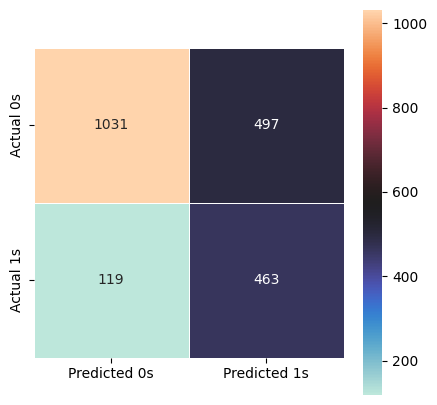

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='icefire')

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.7080568720379147</li>
    <li><b>Correct Predictions:</b> 1494</li>
    <li><b>Incorrect Predictions:</b> 616</li>
    <li><b>Type:</b> Bernoulli</li>
</ul>

#### Random Forest

Random forest is a machine learning algorithm which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fuelled its adoption, as it is capable of handling both classification and regression problems

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical tree like structure which consists of a root node, branches, internal nodes and leaf nodes. A decision tree starts with a root node, which does not have any incoming branches. The outgoing branches from the root node then feed into the internal nodes which are also known as decision nodes. Based on the available features, both node types conduct evaluations to form homogenous subsets, which are denoted by leaf nodes and represent all the possible outcomes within the dataset. Decision trees thus classify data by sorting it down the tree from the root to a leaf node based on the attributes specified by the nodes in the tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the Random Forest model
rfc = RandomForestClassifier(n_estimators=750, max_leaf_nodes=20, n_jobs=-1, random_state=25)
rfc.fit(x_train, y_train)

# Making predictions on test set
y_pred = rfc.predict(x_test)

# Actual value VS Predicted value
svm_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
svm_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [ ]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7990521327014218


<AxesSubplot: >

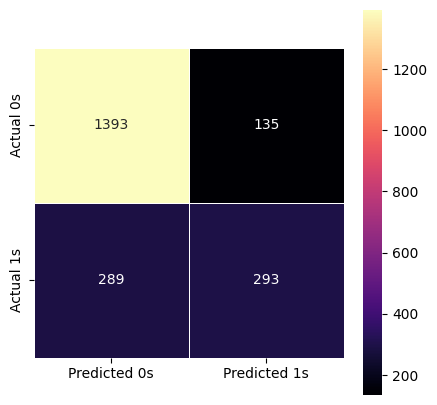

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='magma')

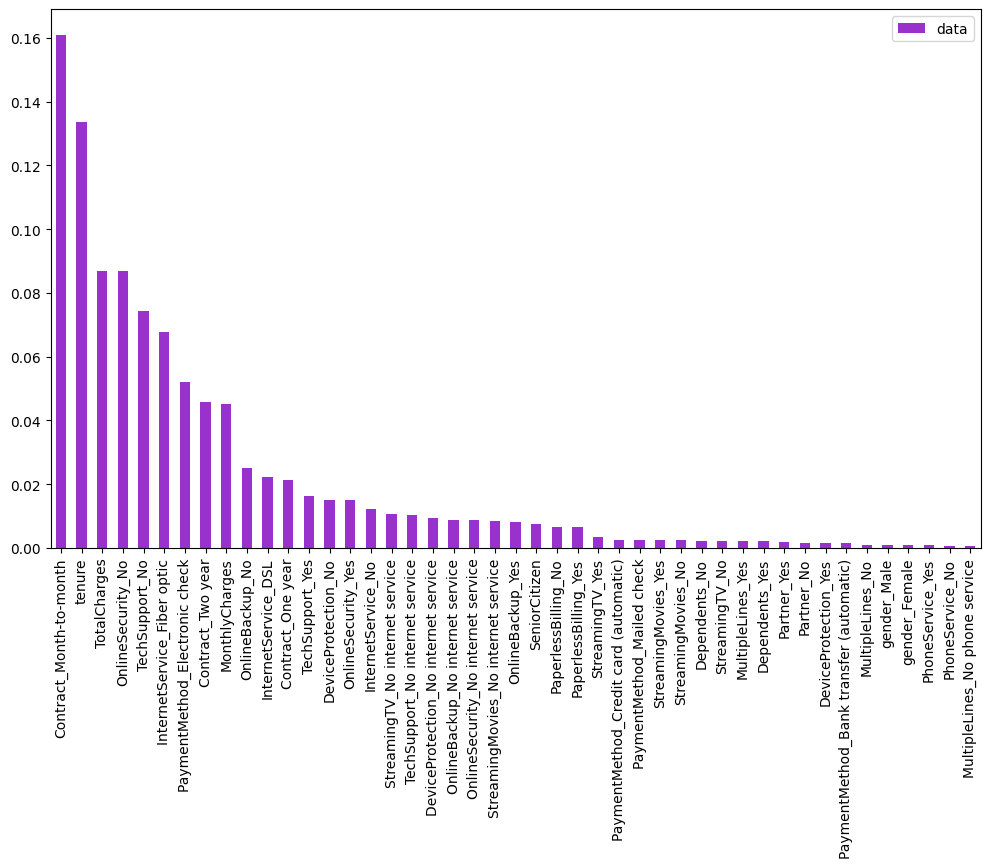

In [ ]:
data = pd.DataFrame(rfc.feature_importances_, index=x.columns, columns=['data']).sort_values('data', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
data.plot(kind='bar', color='darkorchid', ax=ax)
plt.show()

Some conclusions that can be drawn are:

<ul style="list-style-type:square">
    <li>Contract(Month-to-Month), tenure and TotalCharges impact churn rate the most which is similar to what we saw from the results of SVM and Logistic Regression</li>
    <li>Unlike previous models seniority ranks quite low when talking about whether it is an important predictor or not</li>
</ul>

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.7990521327014218</li>
    <li><b>Correct Predictions:</b> 1686</li>
    <li><b>Incorrect Predictions:</b> 424</li>
</ul>

### Predictive Analytics using Boosting Algorithms

The principle behind boosting algorithms is that we first build a model on the training dataset and then build a second model to rectify the errors present in the first model. This procedure is continued until and unless the errors are minimized and the correct predictions are made. Due to this behavior, boosting has become a prevalent technique for tackling binary classification problems. Boosting algorithms thus improve prediction power by converting a number of weak learners into strong learners

#### AdaBoost

The AdaBoost algorithm short for Adaptive Boosting is a boosting algorithm used in Machine Learning

Adaboost starts by making predictions on the original dataset by assigning equal weightage to each observation. If the prediction made using the first learner is incorrect, it allocates higher weight to that incorrectly predicted point. Now all the points with higher weights are given more importance in the next model. It then goes on to add new learners and train models until and unless a lower error is received or the model training limit is reached

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the AdaBoost model
ada = AdaBoostClassifier(n_estimators=150)
ada.fit(x_train, y_train)

# Making predictions on test set
y_pred = ada.predict(x_test)

# Actual value VS Predicted value
ada_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
ada_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [ ]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.795734597156398


<AxesSubplot: >

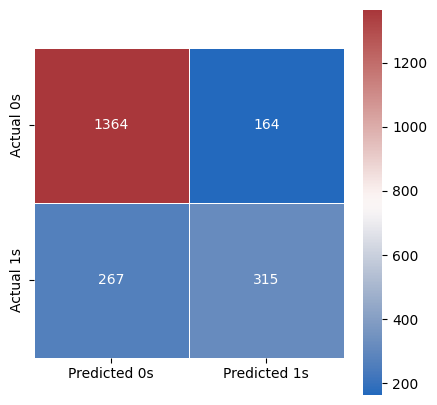

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='vlag')

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.795734597156398</li>
    <li><b>Correct Predictions:</b> 1679</li>
    <li><b>Incorrect Predictions:</b> 431</li>
</ul>

#### Gradient Boosting

In gradient boosting algorithm multiple models are trained sequentially and each new model gradually minimizes the loss function by utilizing the gradient descent method. The Gradient Boosting algorithm utilizes decision trees as the weak learners because the nodes in a decision tree consider a different branch of features for selecting the best split which means that the trees are not the same. Hence, they can capture different outputs from the data

The algorithm builds each tree sequentially because for each new tree the model considers the errors of the last tree and the decision of every successive tree is built based on the mistakes made by the previous tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the Gradient Boost model
gb = GradientBoostingClassifier(criterion='squared_error', min_samples_split=3)
gb.fit(x_train, y_train)

# Making predictions on test set
y_pred = gb.predict(x_test)

# Actual value VS Predicted value
gb_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
gb_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [ ]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8004739336492891


<AxesSubplot: >

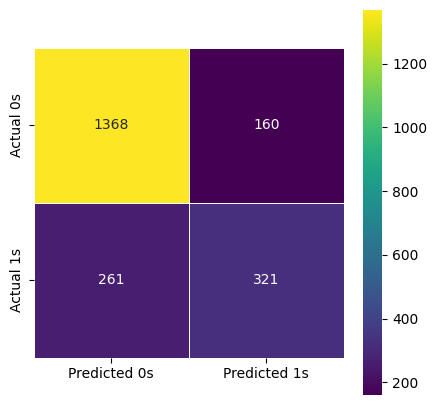

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='viridis')

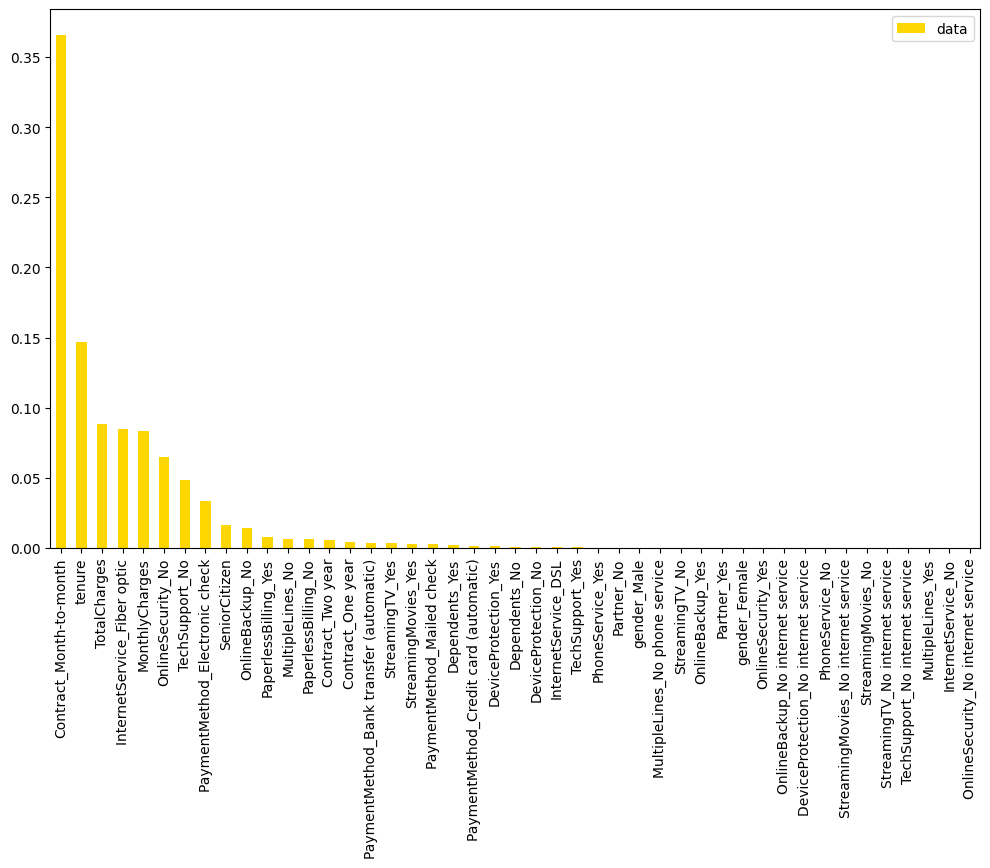

In [ ]:
data = pd.DataFrame(gb.feature_importances_, index=x.columns, columns=['data']).sort_values('data', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
data.plot(kind='bar', color='gold', ax=ax)
plt.show()

Some conclusions that can be drawn are:

<ul style="list-style-type:square">
    <li>Contract(Month-to-Month), tenure and TotalCharges impact churn rate the most which is similar to what we saw from the results of SVM, Logistic Regression and Random Forest</li>
    <li>Unlike previous models InternetService(DSL) ranks quite low when talking about whether it is an important predictor or not</li>
</ul>

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.8004739336492891</li>
    <li><b>Correct Predictions:</b> 1689</li>
    <li><b>Incorrect Predictions:</b> 421</li>
</ul>

#### Extreme Gradient Boosting

The XGBoost algorithm short for Extreme Gradient Boosting is simply an improvised version of the gradient boosting algorithm. The working procedure of both is almost the same. One crucial point in XGBoost is that it implements parallel processing at the node level making it more powerful and fast than the gradient boosting algorithm. XGBoost reduces overfitting and improves overall performance by including various regularization techniques by setting the hyperparameters of the XGBoost algorithm

One important point to note about XGBoost is that you don’t need to worry about the missing values in the dataset because during the training process the model itself learns where to fit the missing values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the Extreme Gradient Boost model
xgb = XGBClassifier(tree_method='approx')
xgb.fit(x_train, y_train)

# Making predictions on test set
y_pred = xgb.predict(x_test)

# Actual value VS Predicted value
xgb_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
xgb_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [ ]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7658767772511849


As done in kNN the performance of the Extreme Gradient Boost model can also be improved by optimizing the values of 'n_estimators' (number of gradient boosted trees which is equivalent to the number of boosting rounds) and 'max_depth' (maximum tree depth for base learners). The technique of cross-validation will be utilized to perform the same

In [ ]:
param_grid = {
    'n_estimators': [i for i in range(100, 401)]
}

xgb = XGBClassifier(tree_method='approx')
xgb_cv= GridSearchCV(xgb, param_grid, n_jobs=-1)
xgb_cv.fit(x, y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 101, 102, 103, 104, 105, 106,
                                          107, 108, 109, 110, 111, 112, 113,
                                          114, 115, 116, 117, 118, 119, 120,
                                          121, 122, 123, 124, 125, 126, 127,
                                          128, 129, ...]})

In [ ]:
xgb_cv.best_params_

{'n_estimators': 101}

In [ ]:
param_grid = {
    'max_depth': [i for i in range(1, 31)]
}

xgb = XGBClassifier(n_estimators=101, tree_method='approx')
xgb_cv= GridSearchCV(xgb, param_grid, n_jobs=-1)
xgb_cv.fit(x, y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=101, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30]})

In [ ]:
xgb_cv.best_params_

{'max_depth': 1}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the Extreme Gradient Boost model
xgb = XGBClassifier(n_estimators=101, max_depth=1, tree_method='approx')
xgb.fit(x_train, y_train)

# Making predictions on test set
y_pred = xgb.predict(x_test)

# Actual value VS Predicted value
xgb_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
xgb_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [ ]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8018957345971564


<AxesSubplot: >

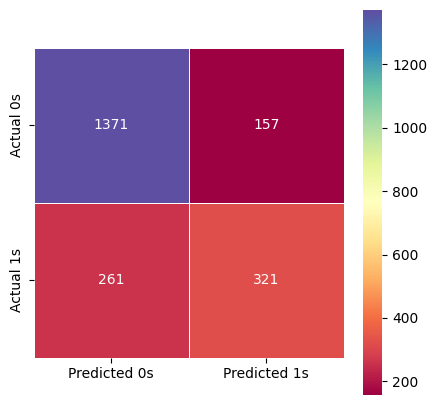

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='Spectral')

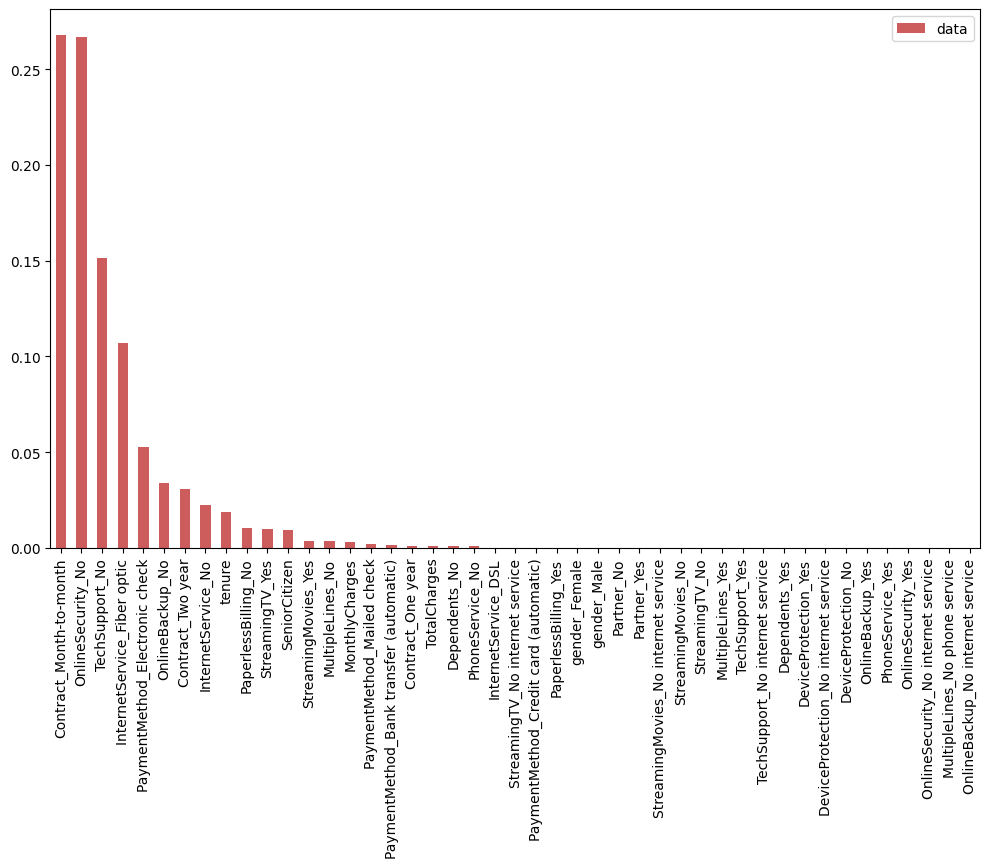

In [ ]:
data = pd.DataFrame(xgb.feature_importances_, index=x.columns, columns=['data']).sort_values('data', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
data.plot(kind='bar', color='indianred', ax=ax)
plt.show()

Some conclusions that can be drawn are:

<ul style="list-style-type:square">
    <li>Contract(Month-to-Month), OnlineSecurity(No) and TechSupport(No) impact churn rate the most which is similar to what we saw from the results of SVM, Logistic Regression, Random Forest and Gradient Boosting</li>
    <li>Unlike previous models TotalCharges and InternetService(DSL) rank quite low when talking about whether they are important predictors or not</li>
</ul>

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.8018957345971564</li>
    <li><b>Correct Predictions:</b> 1692</li>
    <li><b>Incorrect Predictions:</b> 418</li>
</ul>

Till now we have analyzed and made predictions by considering all the variables however the process can be refined a bit more by considering all possible unique combination of variables and utilizing them to make the predictions instead. By doing this we may stumble upon an even better prediction accuracy than the current best value of 0.8018957345971564. This in turn will provide us with many dependable predictors that can be used to predict Churn

### Predictive Analytics on all models by utilizing all unique variable combination pairs

#### Defining the model training functions which will be used to train the models

In [27]:
# Function to train all the models at the same time
def train_models(cols, data):
    dummy = pd.get_dummies(df.head(1)[cols])
    X = x[list(dummy.columns)]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


    # Logistic Regression
    lr = LogisticRegression(max_iter=200)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    # Model Metrics
    accr = metrics.accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    l = len(data.index)

    data.loc[l] = ['Logistic Regression', cols, accr, cm[0][0], cm[0][1], cm[1][1], cm[1][0], cm[0][0] + cm[1][1], cm[0][1] + cm[1][0]]


    # kNN
    knn = KNeighborsClassifier(n_neighbors=48, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    # Model Metrics
    accr = metrics.accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    l = len(data.index)

    data.loc[l] = ['kNN', cols, accr, cm[0][0], cm[0][1], cm[1][1], cm[1][0], cm[0][0] + cm[1][1], cm[0][1] + cm[1][0]]


    # Gradient Boost
    gb = GradientBoostingClassifier(criterion='squared_error', min_samples_split=3)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)

    # Model Metrics
    accr = metrics.accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    l = len(data.index)

    data.loc[l] = ['Gradient Boost', cols, accr, cm[0][0], cm[0][1], cm[1][1], cm[1][0], cm[0][0] + cm[1][1], cm[0][1] + cm[1][0]]


    # Extreme Gradient Boost
    xgb = XGBClassifier(n_estimators=101, max_depth=1, tree_method='approx')
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)

    # Model Metrics
    accr = metrics.accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    l = len(data.index)

    data.loc[l] = ['Extreme Gradient Boost', cols, accr, cm[0][0], cm[0][1], cm[1][1], cm[1][0], cm[0][0] + cm[1][1], cm[0][1] + cm[1][0]]

In [28]:
# Function to train Logistic Regression model
def log_reg(cols, data):
    dummy = pd.get_dummies(df.head(1)[cols])
    X = x[list(dummy.columns)]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

    lr = LogisticRegression(max_iter=200)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    # Model Metrics
    accr = metrics.accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    l = len(data.index)

    data.loc[l] = ['Logistic Regression', cols, accr, cm[0][0], cm[0][1], cm[1][1], cm[1][0], cm[0][0] + cm[1][1], cm[0][1] + cm[1][0]]

In [29]:
# Function to train kNN model
def knn(cols, data):
    dummy = pd.get_dummies(df.head(1)[cols])
    X = x[list(dummy.columns)]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    knn = KNeighborsClassifier(n_neighbors=48, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    # Model Metrics
    accr = metrics.accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    l = len(data.index)

    data.loc[l] = ['kNN', cols, accr, cm[0][0], cm[0][1], cm[1][1], cm[1][0], cm[0][0] + cm[1][1], cm[0][1] + cm[1][0]]

In [30]:
# Function to train Gradient Boost model
def gradient_boost(cols, data):
    dummy = pd.get_dummies(df.head(1)[cols])
    X = x[list(dummy.columns)]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    gb = GradientBoostingClassifier(criterion='squared_error', min_samples_split=3)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)

    # Model Metrics
    accr = metrics.accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    l = len(data.index)

    data.loc[l] = ['Gradient Boost', cols, accr, cm[0][0], cm[0][1], cm[1][1], cm[1][0], cm[0][0] + cm[1][1], cm[0][1] + cm[1][0]]

In [31]:
# Function to train Extreme Gradient Boost model
def e_gradient_boost(cols, data):
    dummy = pd.get_dummies(df.head(1)[cols])
    X = x[list(dummy.columns)]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    xgb = XGBClassifier(n_estimators=101, max_depth=1, tree_method='approx')
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)

    # Model Metrics
    accr = metrics.accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    l = len(data.index)

    data.loc[l] = ['Extreme Gradient Boost', cols, accr, cm[0][0], cm[0][1], cm[1][1], cm[1][0], cm[0][0] + cm[1][1], cm[0][1] + cm[1][0]]

#### Predictive Analytics on all unique single variables

- Generating list of unique single variables and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

data_1_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Training the models

In [ ]:
for col in columns:
    train_models([col], data_1_comb)

- Displaying prediction results based on accuracy

In [ ]:
data_1_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
19,Extreme Gradient Boost,[tenure],0.753081,1424,104,165,417,1589,521
18,Gradient Boost,[tenure],0.753081,1424,104,165,417,1589,521
17,kNN,[tenure],0.745024,1365,163,207,375,1572,538
75,Extreme Gradient Boost,[TotalCharges],0.739810,1491,37,70,512,1561,549
74,Gradient Boost,[TotalCharges],0.739336,1475,53,85,497,1560,550


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.753081</li>
    <li><b>Total Correct Predictions:</b> 1589</li>
    <li><b>Total Incorrect Predictions:</b> 521</li>
    <li><b>Model/s:</b> Extreme Gradient Boost and Gradient Boost</li>
    <li><b>Column/s Used:</b> tenure</li>
</ul>

#### Predictive Analytics on all unique 2 variable combination pairs

- Generating list of unique 2 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_2 = list(combinations(columns, 2))

data_2_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Training the models

In [ ]:
for col_comb in unique_2:
    train_models(list(col_comb), data_2_comb)

- Displaying prediction results based on accuracy

In [ ]:
data_2_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
315,Extreme Gradient Boost,"[tenure, MonthlyCharges]",0.782464,1394,134,257,325,1651,459
683,Extreme Gradient Boost,"[MonthlyCharges, TotalCharges]",0.779621,1394,134,251,331,1645,465
312,Logistic Regression,"[tenure, MonthlyCharges]",0.777725,1393,135,248,334,1641,469
277,kNN,"[tenure, OnlineSecurity]",0.777725,1408,120,233,349,1641,469
682,Gradient Boost,"[MonthlyCharges, TotalCharges]",0.777251,1372,156,268,314,1640,470


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.782464</li>
    <li><b>Total Correct Predictions:</b> 1651</li>
    <li><b>Total Incorrect Predictions:</b> 459</li>
    <li><b>Model/s:</b> Extreme Gradient Boost</li>
    <li><b>Column/s Used:</b> tenure and MonthlyCharges</li>
</ul>

#### Predictive Analytics on all unique 3 variable combination pairs

- Generating list of unique 3 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_3 = list(combinations(columns, 3))

data_3_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Training the models

In [ ]:
for col_comb in unique_3:
    train_models(list(col_comb), data_3_comb)

- Displaying prediction results based on accuracy

In [ ]:
data_3_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
3033,kNN,"[InternetService, OnlineSecurity, TotalCharges]",0.790047,1394,134,273,309,1667,443
2159,Extreme Gradient Boost,"[tenure, InternetService, OnlineSecurity]",0.789573,1413,115,253,329,1666,444
2158,Gradient Boost,"[tenure, InternetService, OnlineSecurity]",0.789573,1401,127,265,317,1666,444
2157,kNN,"[tenure, InternetService, OnlineSecurity]",0.789573,1398,130,268,314,1666,444
2406,Gradient Boost,"[tenure, PaperlessBilling, TotalCharges]",0.789100,1412,116,253,329,1665,445


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.790047</li>
    <li><b>Total Correct Predictions:</b> 1667</li>
    <li><b>Total Incorrect Predictions:</b> 443</li>
    <li><b>Model/s:</b> kNN</li>
    <li><b>Column/s Used:</b> InternetService, OnlineSecurity and TotalCharges</li>
</ul>

#### Predictive Analytics on all unique 4 variable combination pairs

- Generating list of unique 4 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_4 = list(combinations(columns, 4))

data_4_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Training the models

In [ ]:
for col_comb in unique_4:
    train_models(list(col_comb), data_4_comb)

- Displaying prediction results based on accuracy

In [ ]:
data_4_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
10647,Extreme Gradient Boost,"[tenure, InternetService, OnlineSecurity, Pape...",0.797630,1419,109,264,318,1683,427
13691,Extreme Gradient Boost,"[InternetService, OnlineSecurity, PaperlessBil...",0.795735,1446,82,233,349,1679,431
14662,Gradient Boost,"[OnlineSecurity, PaymentMethod, MonthlyCharges...",0.794787,1387,141,290,292,1677,433
10993,kNN,"[tenure, OnlineSecurity, Contract, TotalCharges]",0.794787,1411,117,266,316,1677,433
8327,Extreme Gradient Boost,"[Dependents, tenure, InternetService, OnlineSe...",0.792891,1417,111,256,326,1673,437


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.797630</li>
    <li><b>Total Correct Predictions:</b> 1683</li>
    <li><b>Total Incorrect Predictions:</b> 427</li>
    <li><b>Model/s:</b> Extreme Gradient Boost</li>
    <li><b>Column/s Used:</b> tenure, InternetService, OnlineSecurity and PaperlessBilling</li>
</ul>

#### Predictive Analytics on all unique 5 variable combination pairs

- Generating list of unique 5 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_5 = list(combinations(columns, 5))

data_5_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_5:
    log_reg(list(col_comb), data_5_comb)

In [ ]:
data_5_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
9412,Logistic Regression,"[tenure, OnlineSecurity, PaperlessBilling, Pay...",0.794313,1387,141,289,293,1676,434
9170,Logistic Regression,"[tenure, InternetService, OnlineSecurity, Pape...",0.793839,1394,134,281,301,1675,435
9166,Logistic Regression,"[tenure, InternetService, OnlineSecurity, Cont...",0.793365,1367,161,307,275,1674,436
9158,Logistic Regression,"[tenure, InternetService, OnlineSecurity, Stre...",0.793365,1386,142,288,294,1674,436
8761,Logistic Regression,"[tenure, PhoneService, OnlineSecurity, DeviceP...",0.793365,1393,135,281,301,1674,436


- Model Training
    - kNN

In [ ]:
for col_comb in unique_5:
    knn(list(col_comb), data_5_comb)

In [ ]:
data_5_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
20632,kNN,"[tenure, MultipleLines, OnlineSecurity, Contra...",0.798578,1408,120,277,305,1685,425
20412,kNN,"[tenure, PhoneService, OnlineSecurity, Contrac...",0.798578,1408,120,277,305,1685,425
21512,kNN,"[PhoneService, InternetService, OnlineSecurity...",0.795735,1378,150,301,281,1679,431
22007,kNN,"[MultipleLines, InternetService, OnlineSecurit...",0.795735,1378,150,301,281,1679,431
18182,kNN,"[Partner, MultipleLines, InternetService, Onli...",0.794787,1405,123,272,310,1677,433


- Model Training
    - Gradient Boost

In [ ]:
for col_comb in unique_5:
    gradient_boost(list(col_comb), data_5_comb)

In [ ]:
data_5_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
22998,Gradient Boost,"[OnlineSecurity, StreamingMovies, PaymentMetho...",0.796682,1384,144,297,285,1681,429
21758,Gradient Boost,"[PhoneService, OnlineSecurity, PaymentMethod, ...",0.796209,1392,136,288,294,1680,430
22253,Gradient Boost,"[MultipleLines, OnlineSecurity, PaymentMethod,...",0.796209,1392,136,288,294,1680,430
22988,Gradient Boost,"[OnlineSecurity, StreamingTV, PaymentMethod, M...",0.796209,1378,150,302,280,1680,430
22581,Gradient Boost,"[InternetService, OnlineSecurity, PaperlessBil...",0.795735,1392,136,287,295,1679,431


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_5:
    e_gradient_boost(list(col_comb), data_5_comb)

In [ ]:
data_5_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
40755,Extreme Gradient Boost,"[tenure, InternetService, OnlineSecurity, Pape...",0.800948,1409,119,281,301,1690,420
40961,Extreme Gradient Boost,"[tenure, OnlineSecurity, TechSupport, Paperles...",0.798578,1384,144,301,281,1685,425
40742,Extreme Gradient Boost,"[tenure, InternetService, OnlineSecurity, Stre...",0.797630,1419,109,264,318,1683,427
40721,Extreme Gradient Boost,"[tenure, InternetService, OnlineSecurity, Onli...",0.797630,1411,117,272,310,1683,427
33430,Extreme Gradient Boost,"[gender, tenure, InternetService, OnlineSecuri...",0.797630,1419,109,264,318,1683,427


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.800948</li>
    <li><b>Total Correct Predictions:</b> 1690</li>
    <li><b>Total Incorrect Predictions:</b> 420</li>
    <li><b>Model/s:</b> Extreme Gradient Boost</li>
    <li><b>Column/s Used:</b> tenure, InternetService, OnlineSecurity, PaperlessBilling and PaymentMethod</li>
</ul>

#### Predictive Analytics on all unique 6 variable combination pairs

- Generating list of unique 6 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_6 = list(combinations(columns, 6))

data_6_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_6:
    log_reg(list(col_comb), data_6_comb)

In [ ]:
data_6_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
23747,Logistic Regression,"[tenure, OnlineSecurity, OnlineBackup, Paperle...",0.799052,1391,137,295,287,1686,424
22881,Logistic Regression,"[tenure, MultipleLines, InternetService, Onlin...",0.797156,1392,136,290,292,1682,428
22386,Logistic Regression,"[tenure, PhoneService, InternetService, Online...",0.797156,1392,136,290,292,1682,428
23838,Logistic Regression,"[tenure, OnlineSecurity, TechSupport, Paperles...",0.796682,1366,162,315,267,1681,429
23841,Logistic Regression,"[tenure, OnlineSecurity, TechSupport, PaymentM...",0.795735,1370,158,309,273,1679,431


- Model Training
    - kNN

In [ ]:
for col_comb in unique_6:
    knn(list(col_comb), data_6_comb)

In [ ]:
data_6_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
22220,kNN,"[tenure, PhoneService, MultipleLines, OnlineSe...",0.798578,1408,120,277,305,1685,425
26375,kNN,"[InternetService, OnlineSecurity, TechSupport,...",0.797156,1365,163,317,265,1682,428
24167,kNN,"[PhoneService, MultipleLines, InternetService,...",0.795735,1378,150,301,281,1679,431
19419,kNN,"[Dependents, tenure, MultipleLines, InternetSe...",0.795261,1410,118,268,314,1678,432
19199,kNN,"[Dependents, tenure, PhoneService, InternetSer...",0.795261,1410,118,268,314,1678,432


- Model Training
    - Gradient Boost

In [ ]:
for col_comb in unique_6:
    gradient_boost(list(col_comb), data_6_comb)

In [ ]:
data_6_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
25163,Gradient Boost,"[PhoneService, OnlineSecurity, PaperlessBillin...",0.800948,1389,139,301,281,1690,420
25955,Gradient Boost,"[MultipleLines, OnlineSecurity, PaperlessBilli...",0.800948,1389,139,301,281,1690,420
23409,Gradient Boost,"[tenure, InternetService, OnlineSecurity, Tech...",0.798578,1374,154,311,271,1685,425
25161,Gradient Boost,"[PhoneService, OnlineSecurity, Contract, Paper...",0.798578,1374,154,311,271,1685,425
25953,Gradient Boost,"[MultipleLines, OnlineSecurity, Contract, Pape...",0.798578,1374,154,311,271,1685,425


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_6:
    e_gradient_boost(list(col_comb), data_6_comb)

In [ ]:
data_6_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
22386,Extreme Gradient Boost,"[tenure, PhoneService, InternetService, Online...",0.801422,1406,122,285,297,1691,419
22881,Extreme Gradient Boost,"[tenure, MultipleLines, InternetService, Onlin...",0.801422,1406,122,285,297,1691,419
23431,Extreme Gradient Boost,"[tenure, InternetService, OnlineSecurity, Stre...",0.800948,1409,119,281,301,1690,420
16666,Extreme Gradient Boost,"[Partner, tenure, InternetService, OnlineSecur...",0.800948,1409,119,281,301,1690,420
23441,Extreme Gradient Boost,"[tenure, InternetService, OnlineSecurity, Stre...",0.800474,1411,117,278,304,1689,421


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.801422</li>
    <li><b>Total Correct Predictions:</b> 1691</li>
    <li><b>Total Incorrect Predictions:</b> 419</li>
    <li><b>Model/s:</b> Extreme Gradient Boost</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>tenure, InternetService, OnlineSecurity, PaperlessBilling, PaymentMethod and PhoneService</li>
        <li>tenure, InternetService, OnlineSecurity, PaperlessBilling, PaymentMethod and MultipleLines</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 7 variable combination pairs

- Generating list of unique 7 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_7 = list(combinations(columns, 7))

data_7_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_7:
    log_reg(list(col_comb), data_7_comb)

In [ ]:
data_7_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
46601,Logistic Regression,"[tenure, OnlineSecurity, OnlineBackup, Streami...",0.800948,1394,134,296,286,1690,420
46611,Logistic Regression,"[tenure, OnlineSecurity, OnlineBackup, Streami...",0.800474,1393,135,296,286,1689,421
45741,Logistic Regression,"[tenure, MultipleLines, OnlineSecurity, TechSu...",0.800000,1374,154,314,268,1688,422
44949,Logistic Regression,"[tenure, PhoneService, OnlineSecurity, TechSup...",0.800000,1374,154,314,268,1688,422
35563,Logistic Regression,"[Partner, tenure, OnlineSecurity, OnlineBackup...",0.799526,1393,135,294,288,1687,423


- Model Training
    - kNN

In [ ]:
for col_comb in unique_7:
    knn(list(col_comb), data_7_comb)

In [ ]:
data_7_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
38426,kNN,"[Partner, InternetService, DeviceProtection, C...",0.797156,1390,138,292,290,1682,428
46177,kNN,"[tenure, InternetService, OnlineSecurity, Tech...",0.796682,1376,152,305,277,1681,429
39206,kNN,"[Dependents, tenure, PhoneService, InternetSer...",0.796209,1388,140,292,290,1680,430
39701,kNN,"[Dependents, tenure, MultipleLines, InternetSe...",0.796209,1388,140,292,290,1680,430
49804,kNN,"[InternetService, OnlineSecurity, TechSupport,...",0.795735,1370,158,309,273,1679,431


- Model Training
    - Gradient Boost

In [ ]:
for col_comb in unique_7:
    gradient_boost(list(col_comb), data_7_comb)

In [ ]:
data_7_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
15308,Gradient Boost,"[gender, tenure, OnlineSecurity, PaperlessBill...",0.802370,1384,144,309,273,1693,417
46191,Gradient Boost,"[tenure, InternetService, OnlineSecurity, Tech...",0.800948,1376,152,314,268,1690,420
47495,Gradient Boost,"[PhoneService, MultipleLines, OnlineSecurity, ...",0.800474,1388,140,301,281,1689,421
46724,Gradient Boost,"[tenure, OnlineSecurity, TechSupport, Paperles...",0.800474,1381,147,308,274,1689,421
16595,Gradient Boost,"[gender, PhoneService, OnlineSecurity, Paperle...",0.800000,1386,142,302,280,1688,422


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_7:
    e_gradient_boost(list(col_comb), data_7_comb)

In [ ]:
data_7_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
40275,Extreme Gradient Boost,"[Dependents, tenure, InternetService, OnlineSe...",0.804265,1410,118,287,295,1697,413
31485,Extreme Gradient Boost,"[Partner, Dependents, tenure, InternetService,...",0.803318,1412,116,283,299,1695,415
44542,Extreme Gradient Boost,"[tenure, PhoneService, InternetService, Online...",0.801896,1407,121,285,297,1692,418
30706,Extreme Gradient Boost,"[SeniorCitizen, OnlineSecurity, TechSupport, C...",0.801896,1364,164,328,254,1692,418
45334,Extreme Gradient Boost,"[tenure, MultipleLines, InternetService, Onlin...",0.801896,1407,121,285,297,1692,418


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.804265</li>
    <li><b>Total Correct Predictions:</b> 1697</li>
    <li><b>Total Incorrect Predictions:</b> 413</li>
    <li><b>Model/s:</b> Extreme Gradient Boost</li>
    <li><b>Column/s Used:</b> Dependents, tenure, InternetService, OnlineSecurity, PaperlessBilling, PaymentMethod and TotalCharges</li>
</ul>

#### Predictive Analytics on all unique 8 variable combination pairs

- Generating list of unique 8 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_8 = list(combinations(columns, 8))

data_8_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_8:
    log_reg(list(col_comb), data_8_comb)

In [ ]:
data_8_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
70924,Logistic Regression,"[tenure, MultipleLines, InternetService, Onlin...",0.803318,1388,140,307,275,1695,415
71412,Logistic Regression,"[tenure, MultipleLines, OnlineSecurity, Online...",0.803318,1376,152,319,263,1695,415
70000,Logistic Regression,"[tenure, PhoneService, InternetService, Online...",0.803318,1388,140,307,275,1695,415
70488,Logistic Regression,"[tenure, PhoneService, OnlineSecurity, OnlineB...",0.803318,1376,152,319,263,1695,415
72404,Logistic Regression,"[tenure, OnlineSecurity, DeviceProtection, Tec...",0.802370,1379,149,314,268,1693,417


- Model Training
    - kNN

In [ ]:
for col_comb in unique_8:
    knn(list(col_comb), data_8_comb)

In [ ]:
data_8_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
58521,kNN,"[Partner, tenure, InternetService, OnlineSecur...",0.799526,1374,154,313,269,1687,423
62750,kNN,"[Dependents, tenure, PhoneService, MultipleLin...",0.796209,1388,140,292,290,1680,430
73711,kNN,"[PhoneService, InternetService, OnlineSecurity...",0.795735,1369,159,310,272,1679,431
74503,kNN,"[MultipleLines, InternetService, OnlineSecurit...",0.795735,1369,159,310,272,1679,431
16918,kNN,"[gender, Partner, tenure, InternetService, Pap...",0.795261,1414,114,264,318,1678,432


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_8:
    e_gradient_boost(list(col_comb), data_8_comb)

In [ ]:
data_8_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
64983,Extreme Gradient Boost,"[Dependents, tenure, InternetService, OnlineSe...",0.804265,1410,118,287,295,1697,413
64872,Extreme Gradient Boost,"[Dependents, tenure, InternetService, OnlineSe...",0.804265,1410,118,287,295,1697,413
21711,Extreme Gradient Boost,"[gender, Dependents, tenure, InternetService, ...",0.804265,1410,118,287,295,1697,413
52599,Extreme Gradient Boost,"[Partner, Dependents, tenure, InternetService,...",0.804265,1410,118,287,295,1697,413
64993,Extreme Gradient Boost,"[Dependents, tenure, InternetService, OnlineSe...",0.804265,1410,118,287,295,1697,413


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.804265</li>
    <li><b>Total Correct Predictions:</b> 1697</li>
    <li><b>Total Incorrect Predictions:</b> 413</li>
    <li><b>Model/s:</b> Extreme Gradient Boost</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>gender, Dependents, tenure, InternetService, OnlineSecurity, PaperlessBilling, PaymentMethod and TotalCharges</li>
        <li>Partner, Dependents, tenure, InternetService, OnlineSecurity, PaperlessBilling, PaymentMethod and TotalCharges</li>
        <li>Dependents, tenure, InternetService, OnlineSecurity, StreamingMovies, PaperlessBilling, PaymentMethod and TotalCharges</li>
        <li>Dependents, tenure, InternetService, OnlineSecurity, StreamingTV, PaperlessBilling, PaymentMethod and TotalCharges</li>
        <li>Dependents, tenure, InternetService, OnlineSecurity, OnlineBackup, PaperlessBilling, PaymentMethod and TotalCharges</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 9 variable combination pairs

- Generating list of unique 9 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_9 = list(combinations(columns, 9))

data_9_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_9:
    log_reg(list(col_comb), data_9_comb)

In [ ]:
data_9_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
39588,Logistic Regression,"[gender, tenure, MultipleLines, OnlineSecurity...",0.806161,1379,149,322,260,1701,409
38664,Logistic Regression,"[gender, tenure, PhoneService, OnlineSecurity,...",0.806161,1379,149,322,260,1701,409
88855,Logistic Regression,"[tenure, PhoneService, OnlineSecurity, OnlineB...",0.804739,1380,148,318,264,1698,412
89647,Logistic Regression,"[tenure, MultipleLines, OnlineSecurity, Online...",0.804739,1380,148,318,264,1698,412
88828,Logistic Regression,"[tenure, PhoneService, OnlineSecurity, OnlineB...",0.804265,1389,139,308,274,1697,413


- Model Training
    - kNN

In [ ]:
for col_comb in unique_9:
    knn(list(col_comb), data_9_comb)

In [ ]:
data_9_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
75460,kNN,"[Partner, tenure, PhoneService, InternetServic...",0.799052,1374,154,312,270,1686,424
76384,kNN,"[Partner, tenure, MultipleLines, InternetServi...",0.799052,1374,154,312,270,1686,424
77369,kNN,"[Partner, tenure, InternetService, OnlineSecur...",0.796209,1360,168,320,262,1680,430
77370,kNN,"[Partner, tenure, InternetService, OnlineSecur...",0.796209,1357,171,323,259,1680,430
81895,kNN,"[Dependents, tenure, PhoneService, InternetSer...",0.795735,1373,155,306,276,1679,431


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_9:
    e_gradient_boost(list(col_comb), data_9_comb)

In [ ]:
data_9_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
33169,Extreme Gradient Boost,"[gender, Dependents, tenure, InternetService, ...",0.804265,1410,118,287,295,1697,413
70339,Extreme Gradient Boost,"[Partner, Dependents, tenure, InternetService,...",0.804265,1410,118,287,295,1697,413
83696,Extreme Gradient Boost,"[Dependents, tenure, InternetService, OnlineSe...",0.804265,1410,118,287,295,1697,413
33159,Extreme Gradient Boost,"[gender, Dependents, tenure, InternetService, ...",0.804265,1410,118,287,295,1697,413
70228,Extreme Gradient Boost,"[Partner, Dependents, tenure, InternetService,...",0.804265,1410,118,287,295,1697,413


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.806161</li>
    <li><b>Total Correct Predictions:</b> 1701</li>
    <li><b>Total Incorrect Predictions:</b> 409</li>
    <li><b>Model/s:</b> Logistic Regression</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>gender, tenure, MultipleLines, OnlineSecurity, OnlineBackup, TechSupport, PaperlessBilling, PaymentMethod and MonthlyCharges</li>
        <li>gender, tenure, PhoneService, OnlineSecurity, OnlineBackup, TechSupport, PaperlessBilling, PaymentMethod and MonthlyCharges</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 10 variable combination pairs

- Generating list of unique 10 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_10 = list(combinations(columns, 10))

data_10_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_10:
    log_reg(list(col_comb), data_10_comb)

In [ ]:
data_10_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
45105,Logistic Regression,"[gender, tenure, PhoneService, OnlineSecurity,...",0.809005,1378,150,329,253,1707,403
45897,Logistic Regression,"[gender, tenure, MultipleLines, OnlineSecurity...",0.809005,1378,150,329,253,1707,403
44164,Logistic Regression,"[gender, tenure, PhoneService, MultipleLines, ...",0.806635,1379,149,323,259,1702,408
45889,Logistic Regression,"[gender, tenure, MultipleLines, OnlineSecurity...",0.805687,1380,148,320,262,1700,410
33010,Logistic Regression,"[gender, Partner, tenure, MultipleLines, Onlin...",0.805687,1378,150,322,260,1700,410


- Model Training
    - kNN

In [ ]:
for col_comb in unique_10:
    knn(list(col_comb), data_10_comb)

In [ ]:
data_10_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
79530,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.801422,1376,152,315,267,1691,419
82297,kNN,"[Partner, tenure, OnlineSecurity, DeviceProtec...",0.797630,1356,172,327,255,1683,427
79408,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.797156,1383,145,299,283,1682,428
48486,kNN,"[gender, InternetService, OnlineSecurity, Devi...",0.796682,1376,152,305,277,1681,429
37111,kNN,"[gender, Partner, OnlineSecurity, DeviceProtec...",0.796682,1372,156,309,273,1681,429


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_10:
    e_gradient_boost(list(col_comb), data_10_comb)

In [ ]:
data_10_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
86990,Extreme Gradient Boost,"[Dependents, tenure, InternetService, OnlineSe...",0.804265,1410,118,287,295,1697,413
75678,Extreme Gradient Boost,"[Partner, Dependents, tenure, InternetService,...",0.804265,1410,118,287,295,1697,413
40058,Extreme Gradient Boost,"[gender, Dependents, tenure, InternetService, ...",0.804265,1410,118,287,295,1697,413
75808,Extreme Gradient Boost,"[Partner, Dependents, tenure, InternetService,...",0.804265,1410,118,287,295,1697,413
39938,Extreme Gradient Boost,"[gender, Dependents, tenure, InternetService, ...",0.804265,1410,118,287,295,1697,413


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.809005</li>
    <li><b>Total Correct Predictions:</b> 1707</li>
    <li><b>Total Incorrect Predictions:</b> 403</li>
    <li><b>Model/s:</b> Logistic Regression</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>gender, tenure, MultipleLines, OnlineSecurity, OnlineBackup, TechSupport, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
        <li>gender, tenure, PhoneService, OnlineSecurity, OnlineBackup, TechSupport, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 11 variable combination pairs

- Generating list of unique 11 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_11 = list(combinations(columns, 11))

data_11_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_11:
    log_reg(list(col_comb), data_11_comb)

In [ ]:
data_11_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
41321,Logistic Regression,"[gender, tenure, PhoneService, MultipleLines, ...",0.808531,1377,151,329,253,1706,404
33027,Logistic Regression,"[gender, Partner, tenure, MultipleLines, Onlin...",0.807583,1376,152,328,254,1704,406
32235,Logistic Regression,"[gender, Partner, tenure, PhoneService, Online...",0.807583,1376,152,328,254,1704,406
41952,Logistic Regression,"[gender, tenure, PhoneService, OnlineSecurity,...",0.807109,1377,151,326,256,1703,407
42447,Logistic Regression,"[gender, tenure, MultipleLines, OnlineSecurity...",0.807109,1377,151,326,256,1703,407


- Model Training
    - kNN

In [ ]:
for col_comb in unique_11:
    knn(list(col_comb), data_11_comb)

In [ ]:
data_11_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
33401,kNN,"[gender, Partner, tenure, InternetService, Onl...",0.800948,1368,160,322,260,1690,420
43730,kNN,"[gender, InternetService, OnlineSecurity, Devi...",0.800474,1387,141,302,280,1689,421
69932,kNN,"[Partner, tenure, MultipleLines, OnlineSecurit...",0.800000,1370,158,318,264,1688,422
69437,kNN,"[Partner, tenure, PhoneService, OnlineSecurity...",0.800000,1370,158,318,264,1688,422
70077,kNN,"[Partner, tenure, InternetService, OnlineSecur...",0.798104,1355,173,329,253,1684,426


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_11:
    e_gradient_boost(list(col_comb), data_11_comb)

In [ ]:
data_11_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
27188,Extreme Gradient Boost,"[gender, Partner, Dependents, tenure, Internet...",0.804265,1410,118,287,295,1697,413
38370,Extreme Gradient Boost,"[gender, Dependents, tenure, InternetService, ...",0.804265,1410,118,287,295,1697,413
27068,Extreme Gradient Boost,"[gender, Partner, Dependents, tenure, Internet...",0.804265,1410,118,287,295,1697,413
27058,Extreme Gradient Boost,"[gender, Partner, Dependents, tenure, Internet...",0.804265,1410,118,287,295,1697,413
65826,Extreme Gradient Boost,"[Partner, Dependents, tenure, InternetService,...",0.804265,1410,118,287,295,1697,413


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.808531	</li>
    <li><b>Total Correct Predictions:</b> 1706</li>
    <li><b>Total Incorrect Predictions:</b> 404</li>
    <li><b>Model/s:</b> Logistic Regression</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>gender, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, TechSupport, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 12 variable combination pairs

- Generating list of unique 12 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_12 = list(combinations(columns, 12))

data_12_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_12:
    log_reg(list(col_comb), data_12_comb)

In [ ]:
data_12_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
25019,Logistic Regression,"[gender, Partner, tenure, PhoneService, Multip...",0.808057,1376,152,329,253,1705,405
30864,Logistic Regression,"[gender, tenure, PhoneService, MultipleLines, ...",0.807583,1377,151,327,255,1704,406
25650,Logistic Regression,"[gender, Partner, tenure, PhoneService, Online...",0.807109,1376,152,327,255,1703,407
26145,Logistic Regression,"[gender, Partner, tenure, MultipleLines, Onlin...",0.807109,1376,152,327,255,1703,407
30815,Logistic Regression,"[gender, tenure, PhoneService, MultipleLines, ...",0.806635,1380,148,322,260,1702,408


- Model Training
    - kNN

In [ ]:
for col_comb in unique_12:
    knn(list(col_comb), data_12_comb)

In [ ]:
data_12_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
48182,kNN,"[Partner, tenure, InternetService, OnlineSecur...",0.799526,1355,173,332,250,1687,423
47637,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.798578,1368,160,317,265,1685,425
25660,kNN,"[gender, Partner, tenure, PhoneService, Online...",0.798578,1362,166,323,259,1685,425
26155,kNN,"[gender, Partner, tenure, MultipleLines, Onlin...",0.798578,1362,166,323,259,1685,425
46086,kNN,"[Partner, Dependents, tenure, InternetService,...",0.797630,1348,180,335,247,1683,427


- Model Training
    - Gradient Boost

In [ ]:
for col_comb in unique_12:
    gradient_boost(list(col_comb), data_12_comb)

In [ ]:
data_12_comb.sort_values(by='accuracy', ascending=False).head()

- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_12:
    e_gradient_boost(list(col_comb), data_12_comb)

In [ ]:
data_12_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
22068,Extreme Gradient Boost,"[gender, Partner, Dependents, tenure, Internet...",0.804265,1410,118,287,295,1697,413
28762,Extreme Gradient Boost,"[gender, Dependents, tenure, MultipleLines, In...",0.803791,1398,130,298,284,1696,414
27601,Extreme Gradient Boost,"[gender, Dependents, tenure, PhoneService, Mul...",0.803791,1398,130,298,284,1696,414
28267,Extreme Gradient Boost,"[gender, Dependents, tenure, PhoneService, Int...",0.803791,1398,130,298,284,1696,414
48587,Extreme Gradient Boost,"[Dependents, tenure, PhoneService, MultipleLin...",0.803791,1396,132,300,282,1696,414


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.808057	</li>
    <li><b>Total Correct Predictions:</b> 1705</li>
    <li><b>Total Incorrect Predictions:</b> 405</li>
    <li><b>Model/s:</b> Logistic Regression</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>gender, Partner, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, TechSupport, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 13 variable combination pairs

- Generating list of unique 13 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_13 = list(combinations(columns, 13))

data_13_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_13:
    log_reg(list(col_comb), data_13_comb)

In [ ]:
data_13_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
15784,Logistic Regression,"[gender, Partner, tenure, PhoneService, Multip...",0.807109,1376,152,327,255,1703,407
15779,Logistic Regression,"[gender, Partner, tenure, PhoneService, Multip...",0.806161,1378,150,323,259,1701,409
18306,Logistic Regression,"[gender, tenure, PhoneService, MultipleLines, ...",0.806161,1377,151,324,258,1701,409
26770,Logistic Regression,"[Dependents, tenure, PhoneService, MultipleLin...",0.805687,1363,165,337,245,1700,410
15735,Logistic Regression,"[gender, Partner, tenure, PhoneService, Multip...",0.805687,1378,150,322,260,1700,410


- Model Training
    - kNN

In [ ]:
for col_comb in unique_13:
    knn(list(col_comb), data_13_comb)

In [ ]:
data_13_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
15527,kNN,"[gender, Partner, tenure, PhoneService, Multip...",0.799526,1373,155,314,268,1687,423
26147,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.797156,1354,174,328,254,1682,428
26357,kNN,"[Partner, tenure, PhoneService, InternetServic...",0.797156,1361,167,321,261,1682,428
26137,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.797156,1356,172,326,256,1682,428
26229,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.797156,1364,164,318,264,1682,428


- Model Training
    - Gradient Boost

In [ ]:
for col_comb in unique_13:
    gradient_boost(list(col_comb), data_13_comb)

In [ ]:
data_13_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
8226,Gradient Boost,"[gender, SeniorCitizen, Dependents, tenure, Ph...",0.804265,1380,148,317,265,1697,413
23911,Gradient Boost,"[SeniorCitizen, Dependents, tenure, InternetSe...",0.803791,1370,158,326,256,1696,414
22304,Gradient Boost,"[SeniorCitizen, Partner, tenure, MultipleLines...",0.803318,1376,152,319,263,1695,415
20555,Gradient Boost,"[SeniorCitizen, Partner, Dependents, tenure, O...",0.803318,1371,157,324,258,1695,415
22084,Gradient Boost,"[SeniorCitizen, Partner, tenure, PhoneService,...",0.803318,1376,152,319,263,1695,415


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_13:
    e_gradient_boost(list(col_comb), data_13_comb)

In [ ]:
data_13_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
16763,Extreme Gradient Boost,"[gender, Dependents, tenure, PhoneService, Mul...",0.803791,1398,130,298,284,1696,414
16834,Extreme Gradient Boost,"[gender, Dependents, tenure, PhoneService, Mul...",0.803318,1387,141,308,274,1695,415
13280,Extreme Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.802844,1411,117,283,299,1694,416
12614,Extreme Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.802844,1411,117,283,299,1694,416
16856,Extreme Gradient Boost,"[gender, Dependents, tenure, PhoneService, Mul...",0.802844,1411,117,283,299,1694,416


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.807109</li>
    <li><b>Total Correct Predictions:</b> 1703</li>
    <li><b>Total Incorrect Predictions:</b> 407</li>
    <li><b>Model/s:</b> Logistic Regression</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>gender, Partner, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, TechSupport, StreamingMovies, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 14 variable combination pairs

- Generating list of unique 14 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_14 = list(combinations(columns, 14))

data_14_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_14:
    log_reg(list(col_comb), data_14_comb)

In [ ]:
data_14_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
10652,Logistic Regression,"[SeniorCitizen, Dependents, tenure, PhoneServi...",0.805213,1368,160,331,251,1699,411
8291,Logistic Regression,"[gender, Dependents, tenure, PhoneService, Onl...",0.805213,1364,164,335,247,1699,411
10505,Logistic Regression,"[SeniorCitizen, Dependents, tenure, PhoneServi...",0.805213,1368,160,331,251,1699,411
7750,Logistic Regression,"[gender, Partner, tenure, PhoneService, Multip...",0.805213,1377,151,322,260,1699,411
8357,Logistic Regression,"[gender, Dependents, tenure, MultipleLines, On...",0.805213,1364,164,335,247,1699,411


- Model Training
    - kNN

In [ ]:
for col_comb in unique_14:
    knn(list(col_comb), data_14_comb)

In [ ]:
data_14_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
11423,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.799526,1361,167,326,256,1687,423
11061,kNN,"[Partner, Dependents, tenure, PhoneService, Mu...",0.796682,1371,157,310,272,1681,429
11445,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.796682,1363,165,318,264,1681,429
11419,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.796209,1354,174,326,256,1680,430
11447,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.796209,1365,163,315,267,1680,430


- Model Training
    - Gradient Boost

In [ ]:
for col_comb in unique_14:
    gradient_boost(list(col_comb), data_14_comb)

In [ ]:
data_14_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
6756,Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.804739,1377,151,321,261,1698,412
6976,Gradient Boost,"[gender, Partner, Dependents, tenure, Multiple...",0.804265,1377,151,320,262,1697,413
6784,Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.803791,1375,153,321,261,1696,414
7161,Gradient Boost,"[gender, Partner, Dependents, tenure, Internet...",0.803318,1371,157,324,258,1695,415
7004,Gradient Boost,"[gender, Partner, Dependents, tenure, Multiple...",0.803318,1375,153,320,262,1695,415


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_14:
    e_gradient_boost(list(col_comb), data_14_comb)

In [ ]:
data_14_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
6300,Extreme Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.802844,1411,117,283,299,1694,416
8012,Extreme Gradient Boost,"[gender, Dependents, tenure, PhoneService, Mul...",0.802370,1397,131,296,286,1693,417
11356,Extreme Gradient Boost,"[Partner, Dependents, PhoneService, MultipleLi...",0.801896,1371,157,321,261,1692,418
8416,Extreme Gradient Boost,"[gender, Dependents, PhoneService, MultipleLin...",0.801896,1371,157,321,261,1692,418
2201,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, P...",0.801896,1367,161,325,257,1692,418


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.805213</li>
    <li><b>Total Correct Predictions:</b> 1699</li>
    <li><b>Total Incorrect Predictions:</b> 411</li>
    <li><b>Model/s:</b> Logistic Regression</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>gender, Dependents, tenure, MultipleLines, OnlineSecurity, OnlineBackup, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
        <li>gender, Partner, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
        <li>gender, Dependents, tenure, PhoneService, OnlineSecurity, OnlineBackup, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
        <li>SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, TechSupport, StreamingTV, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
        <li>SeniorCitizen, Dependents, tenure, PhoneService, InternetService, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 15 variable combination pairs

- Generating list of unique 15 variable combination pairs and defining the dataframe which will hold the data

In [ ]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_15 = list(combinations(columns, 15))

data_15_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [ ]:
for col_comb in unique_15:
    log_reg(list(col_comb), data_15_comb)

In [ ]:
data_15_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
3664,Logistic Regression,"[SeniorCitizen, Dependents, tenure, PhoneServi...",0.805687,1368,160,332,250,1700,410
3003,Logistic Regression,"[gender, Dependents, tenure, PhoneService, Mul...",0.805213,1364,164,335,247,1699,411
3341,Logistic Regression,"[SeniorCitizen, Partner, Dependents, tenure, P...",0.804739,1364,164,334,248,1698,412
3407,Logistic Regression,"[SeniorCitizen, Partner, Dependents, tenure, M...",0.804739,1364,164,334,248,1698,412
3017,Logistic Regression,"[gender, Dependents, tenure, PhoneService, Onl...",0.804739,1362,166,336,246,1698,412


- Model Training
    - kNN

In [ ]:
for col_comb in unique_15:
    knn(list(col_comb), data_15_comb)

In [ ]:
data_15_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
2925,kNN,"[gender, Partner, tenure, InternetService, Onl...",0.795735,1346,182,333,249,1679,431
3851,kNN,"[Partner, tenure, PhoneService, MultipleLines,...",0.794787,1348,180,329,253,1677,433
3759,kNN,"[Partner, Dependents, tenure, PhoneService, Mu...",0.793365,1372,156,302,280,1674,436
1723,kNN,"[gender, SeniorCitizen, Partner, tenure, Inter...",0.792891,1355,173,318,264,1673,437
2313,kNN,"[gender, SeniorCitizen, tenure, PhoneService, ...",0.792891,1375,153,298,284,1673,437


- Model Training
    - Gradient Boost

In [ ]:
for col_comb in unique_15:
    gradient_boost(list(col_comb), data_15_comb)

In [ ]:
data_15_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
2453,Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.804739,1377,151,321,261,1698,412
2630,Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.804739,1377,151,321,261,1698,412
833,Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.804739,1370,158,328,254,1698,412
613,Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.804739,1370,158,328,254,1698,412
2696,Gradient Boost,"[gender, Partner, Dependents, tenure, Multiple...",0.804265,1377,151,320,262,1697,413


- Model Training
    - Extreme Gradient Boost

In [ ]:
for col_comb in unique_15:
    e_gradient_boost(list(col_comb), data_15_comb)

In [ ]:
data_15_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
757,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.801896,1402,126,290,292,1692,418
52,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.801896,1402,126,290,292,1692,418
3102,Extreme Gradient Boost,"[SeniorCitizen, Partner, Dependents, tenure, P...",0.801896,1402,126,290,292,1692,418
168,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.801896,1402,126,290,292,1692,418
2788,Extreme Gradient Boost,"[gender, Partner, Dependents, PhoneService, Mu...",0.801896,1371,157,321,261,1692,418


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.805687</li>
    <li><b>Total Correct Predictions:</b> 1700</li>
    <li><b>Total Incorrect Predictions:</b> 410</li>
    <li><b>Model/s:</b> Logistic Regression</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 16 variable combination pairs

- Generating list of unique 16 variable combination pairs and defining the dataframe which will hold the data

In [46]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_16 = list(combinations(columns, 16))

data_16_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [33]:
for col_comb in unique_16:
    log_reg(list(col_comb), data_16_comb)

In [35]:
data_16_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
811,Logistic Regression,"[gender, Dependents, tenure, PhoneService, Mul...",0.804739,1362,166,336,246,1698,412
877,Logistic Regression,"[SeniorCitizen, Partner, Dependents, tenure, P...",0.804739,1364,164,334,248,1698,412
516,Logistic Regression,"[gender, SeniorCitizen, Partner, tenure, Phone...",0.804265,1362,166,335,247,1697,413
199,Logistic Regression,"[gender, SeniorCitizen, Partner, Dependents, t...",0.803791,1362,166,334,248,1696,414
185,Logistic Regression,"[gender, SeniorCitizen, Partner, Dependents, t...",0.803791,1359,169,337,245,1696,414


- Model Training
    - kNN

In [37]:
for col_comb in unique_16:
    knn(list(col_comb), data_16_comb)

In [38]:
data_16_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
798,kNN,"[gender, Partner, tenure, MultipleLines, Inter...",0.795261,1348,180,330,252,1678,432
797,kNN,"[gender, Partner, tenure, PhoneService, Intern...",0.795261,1348,180,330,252,1678,432
752,kNN,"[gender, Partner, Dependents, tenure, PhoneSer...",0.792417,1344,184,328,254,1672,438
764,kNN,"[gender, Partner, Dependents, tenure, Multiple...",0.792417,1344,184,328,254,1672,438
747,kNN,"[gender, Partner, Dependents, tenure, PhoneSer...",0.790995,1337,191,332,250,1669,441


- Model Training
    - Gradient Boost

In [40]:
for col_comb in unique_16:
    gradient_boost(list(col_comb), data_16_comb)

In [42]:
data_16_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
264,Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.806635,1370,158,332,250,1702,408
330,Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.806635,1370,158,332,250,1702,408
118,Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.805213,1370,158,329,253,1699,411
710,Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.804265,1377,151,320,262,1697,413
718,Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.803318,1375,153,320,262,1695,415


- Model Training
    - Extreme Gradient Boost

In [44]:
for col_comb in unique_16:
    e_gradient_boost(list(col_comb), data_16_comb)

In [45]:
data_16_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
42,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.801896,1402,126,290,292,1692,418
432,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, P...",0.801422,1368,160,323,259,1691,419
376,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, P...",0.801422,1368,160,323,259,1691,419
381,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, P...",0.801422,1368,160,323,259,1691,419
421,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, P...",0.801422,1370,158,321,261,1691,419


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.806635</li>
    <li><b>Total Correct Predictions:</b> 1702</li>
    <li><b>Total Incorrect Predictions:</b> 408</li>
    <li><b>Model/s:</b> Gradient Boost</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, InternetService, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
        <li>gender, SeniorCitizen, Partner, Dependents, tenure, MultipleLines, InternetService, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
      </ul>
    </li>
</ul>

#### Predictive Analytics on all unique 17 variable combination pairs

- Generating list of unique 17 variable combination pairs and defining the dataframe which will hold the data

In [61]:
columns = list(df.columns)
columns.remove('customerID')
columns.remove('Churn')

unique_17 = list(combinations(columns, 17))

data_17_comb = pd.DataFrame(
    columns=[
        'model',
        'col_combination', 
        'accuracy', 
        'correct_0_pred', 
        'incorrect_0_pred', 
        'correct_1_pred', 
        'incorrect_1_pred', 
        'total_correct_pred', 
        'total_incorrect_pred'
    ]
)

- Model Training
    - Logistic Regression

In [48]:
for col_comb in unique_17:
    log_reg(list(col_comb), data_17_comb)

In [50]:
data_17_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
61,Logistic Regression,"[gender, SeniorCitizen, Partner, Dependents, t...",0.803791,1363,165,333,249,1696,414
164,Logistic Regression,"[SeniorCitizen, Partner, Dependents, tenure, P...",0.801896,1360,168,332,250,1692,418
44,Logistic Regression,"[gender, SeniorCitizen, Partner, Dependents, t...",0.801896,1363,165,329,253,1692,418
131,Logistic Regression,"[gender, SeniorCitizen, Dependents, tenure, Ph...",0.801896,1359,169,333,249,1692,418
63,Logistic Regression,"[gender, SeniorCitizen, Partner, Dependents, t...",0.801422,1360,168,331,251,1691,419


- Model Training
    - kNN

In [52]:
for col_comb in unique_17:
    knn(list(col_comb), data_17_comb)

In [53]:
data_17_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
151,kNN,"[gender, Partner, tenure, PhoneService, Multip...",0.790521,1348,180,320,262,1668,442
142,kNN,"[gender, Partner, Dependents, tenure, PhoneSer...",0.790047,1342,186,325,257,1667,443
111,kNN,"[gender, SeniorCitizen, Partner, tenure, Phone...",0.789100,1351,177,314,268,1665,445
148,kNN,"[gender, Partner, Dependents, tenure, PhoneSer...",0.787678,1339,189,323,259,1662,448
149,kNN,"[gender, Partner, Dependents, tenure, Multiple...",0.787678,1339,189,323,259,1662,448


- Model Training
    - Gradient Boost

In [55]:
for col_comb in unique_17:
    gradient_boost(list(col_comb), data_17_comb)

In [57]:
data_17_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
44,Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.805687,1370,158,330,252,1700,410
141,Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.803318,1371,157,324,258,1695,415
110,Gradient Boost,"[gender, SeniorCitizen, Partner, tenure, Phone...",0.802370,1372,156,321,261,1693,417
85,Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.801896,1368,160,324,258,1692,418
73,Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.801896,1368,160,324,258,1692,418


- Model Training
    - Extreme Gradient Boost

In [59]:
for col_comb in unique_17:
    e_gradient_boost(list(col_comb), data_17_comb)

In [60]:
data_17_comb.sort_values(by='accuracy', ascending=False).head()

,model,col_combination,accuracy,correct_0_pred,incorrect_0_pred,correct_1_pred,incorrect_1_pred,total_correct_pred,total_incorrect_pred
93,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, P...",0.801422,1368,160,323,259,1691,419
22,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.800948,1395,133,295,287,1690,420
137,Extreme Gradient Boost,"[gender, Partner, Dependents, tenure, PhoneSer...",0.799526,1376,152,311,271,1687,423
7,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.798578,1393,135,292,290,1685,425
90,Extreme Gradient Boost,"[gender, SeniorCitizen, Partner, Dependents, t...",0.798104,1369,159,315,267,1684,426


<ul style="list-style-type:square">
    <li><b>Highest Accuracy:</b> 0.805687</li>
    <li><b>Total Correct Predictions:</b> 1700</li>
    <li><b>Total Incorrect Predictions:</b> 410</li>
    <li><b>Model/s:</b> Gradient Boost</li>
    <li><b>Column/s Used:</b>
      <ul>
        <li>gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges</li>
      </ul>
    </li>
</ul>